# Load Library and data


In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

df = pd.read_csv('secondary_data.csv', delimiter=';')
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w


# Feature Engineering


In [52]:
color_mapping = {
    'n': 'brown', 'b': 'buff', 'g': 'gray', 'r': 'green',
    'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white',
    'y': 'yellow', 'l': 'blue', 'o': 'orange', 'k': 'black',
    'f': 'none'
}

# Apply all replacements
df['class'].replace({'p': 'poisonous', 'e': 'edible'}, inplace=True)

df['cap-shape'].replace({
    'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat',
    's': 'sunken', 'p': 'spherical', 'o': 'others'
}, inplace=True)

df['cap-surface'].replace({
    'i': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth',
    'h': 'shiny', 'l': 'leathery', 'k': 'silky', 't': 'sticky',
    'w': 'wrinkled', 'e': 'fleshy'
}, inplace=True)

# Use the color mapping for all color columns
for col in ['cap-color', 'gill-color', 'stem-color', 'veil-color', 'spore-print-color']:
    df[col].replace(color_mapping, inplace=True)

df['does-bruise-or-bleed'].replace({'t': 'bruises-or-bleeding', 'f': 'no'}, inplace=True)

df['gill-attachment'].replace({
    'a': 'adnate', 'x': 'adnexed', 'd': 'decurrent', 'e': 'free',
    's': 'sinuate', 'p': 'pores', 'f': 'none', '?': 'unknown'
}, inplace=True)

df['gill-spacing'].replace({'c': 'close', 'd': 'distant', 'f': 'none'}, inplace=True)

df['stem-root'].replace({
    'b': 'bulbous', 's': 'swollen', 'c': 'club', 'u': 'cup',
    'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted', 'f': 'none'
}, inplace=True)

df['stem-surface'].replace({
    'i': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth',
    'h': 'shiny', 'l': 'leathery', 'k': 'silky', 't': 'sticky',
    'w': 'wrinkled', 'e': 'fleshy', 'f': 'none'
}, inplace=True)

df['veil-type'].replace({'p': 'partial', 'u': 'universal'}, inplace=True)
df['has-ring'].replace({'t': 'ring', 'f': 'none'}, inplace=True)

df['ring-type'].replace({
    'c': 'cobwebby', 'e': 'evanescent', 'r': 'flaring', 'g': 'grooved',
    'l': 'large', 'p': 'pendant', 's': 'sheathing', 'z': 'zone',
    'y': 'scaly', 'm': 'movable', 'f': 'none', '?': 'unknown'
}, inplace=True)

df['habitat'].replace({
    'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths',
    'h': 'heaths', 'u': 'urban', 'w': 'waste', 'd': 'woods'
}, inplace=True)

df['season'].replace({
    's': 'spring', 'u': 'summer', 'a': 'autumn', 'w': 'winter'
}, inplace=True)


# Exploratory Data Analysis


## Bivariate


In [53]:
def plot_kde_by_class(df, column, title=None):
    """
    Create a KDE plot for a numerical column grouped by class.
    
    Parameters:
    df: DataFrame containing the data
    column: str, name of the numerical column to plot
    title: str, optional title for the plot
    """
    plt.figure(figsize=(10, 6))
    
    # Define colors for each class
    colors = {'poisonous': '#FF6B6B', 'edible': '#4ECDC4'}
    
    for class_type in df['class'].unique():
        subset = df[df['class'] == class_type]
        sns.kdeplot(data=subset, x=column, label=class_type, color=colors.get(class_type), linewidth=2.5, alpha=0.6, fill=True)
    
    if title is None:
        title = f'KDE Plot of {column.title()} by Class'
    
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(column.replace('-', ' ').title(), fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

In [54]:
def plot_bar_by_class(df, column, title=None):
    """
    Create a bar plot for a categorical column grouped by class with count and percentage labels.

    Parameters:
    df: DataFrame containing the data
    column: str, name of the categorical column to plot
    title: str, optional title for the plot
    """
    # Create cross-tabulation
    crosstab = pd.crosstab(df[column], df['class'])

    # Define colors for each class
    colors = ['#4ECDC4', '#FF6B6B']  # poisonous, edible

    # Create bar plot
    ax = crosstab.plot(kind='bar', color=colors, alpha=0.8, figsize=(16, 8))

    # Add count and percentage labels on top of bars
    for container in ax.containers:
        # Get the class name from the legend
        class_name = container.get_label()

        # Add labels with count and percentage
        labels = []
        for i, bar in enumerate(container):
            height = bar.get_height()
            if height > 0:  # Only add label if bar has height
                category = crosstab.index[i]
                total_for_category = crosstab.loc[category].sum()
                percentage = (height / total_for_category) * 100
                labels.append(f'{int(height)}\n({percentage:.1f}%)')
            else:
                labels.append('')

        ax.bar_label(container, labels=labels, fontsize=9)

    if title is None:
        title = f'Bar Plot of {column.title()} by Class'

    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(column.replace('-', ' ').title(), fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='Class', fontsize=11)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()

### cap-surface


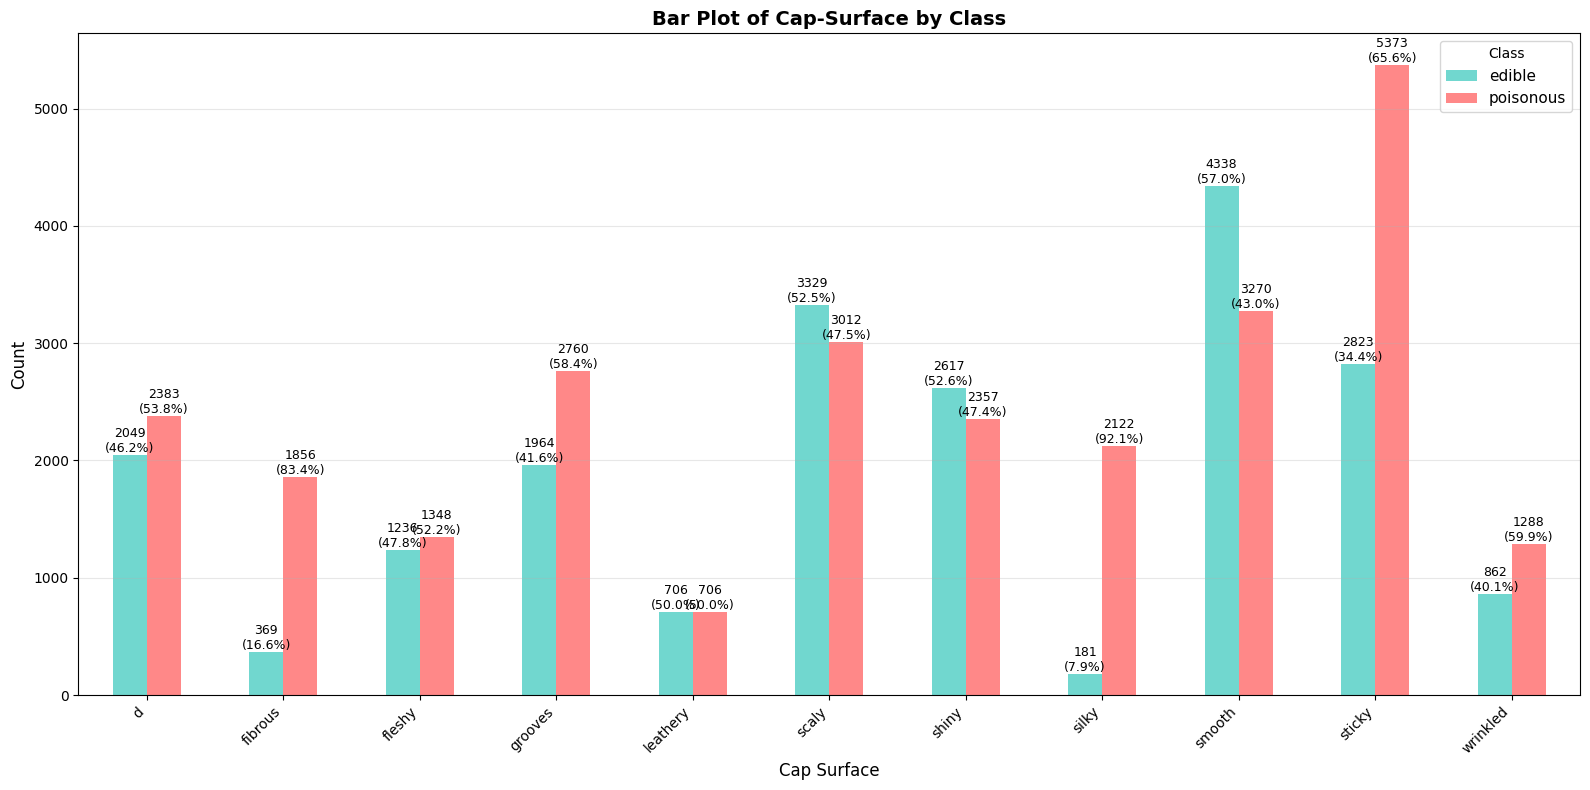

In [55]:
plot_bar_by_class(df, 'cap-surface')

### Cap Diameter


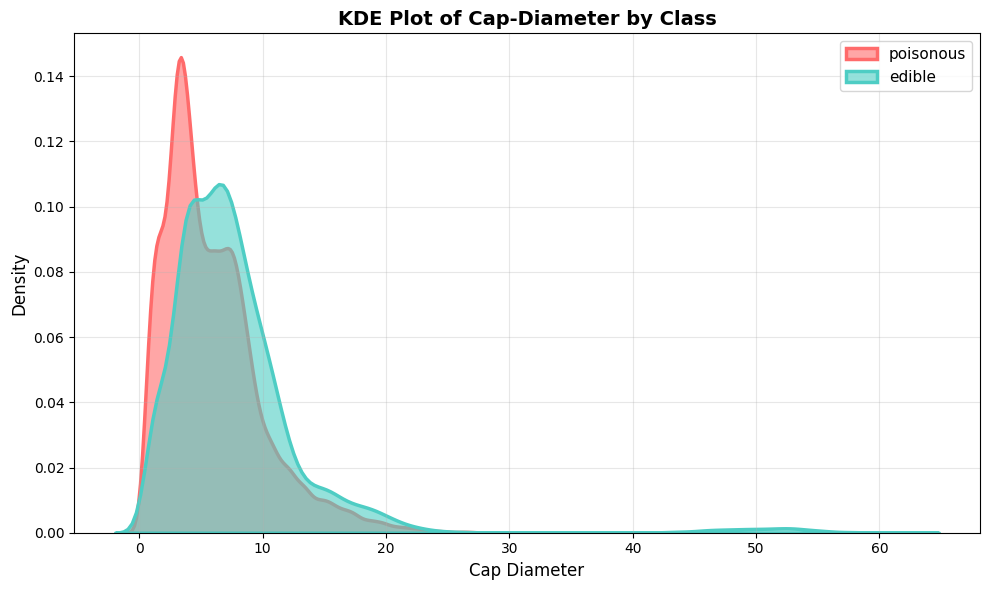

In [56]:
plot_kde_by_class(df, 'cap-diameter')

### cap-shape


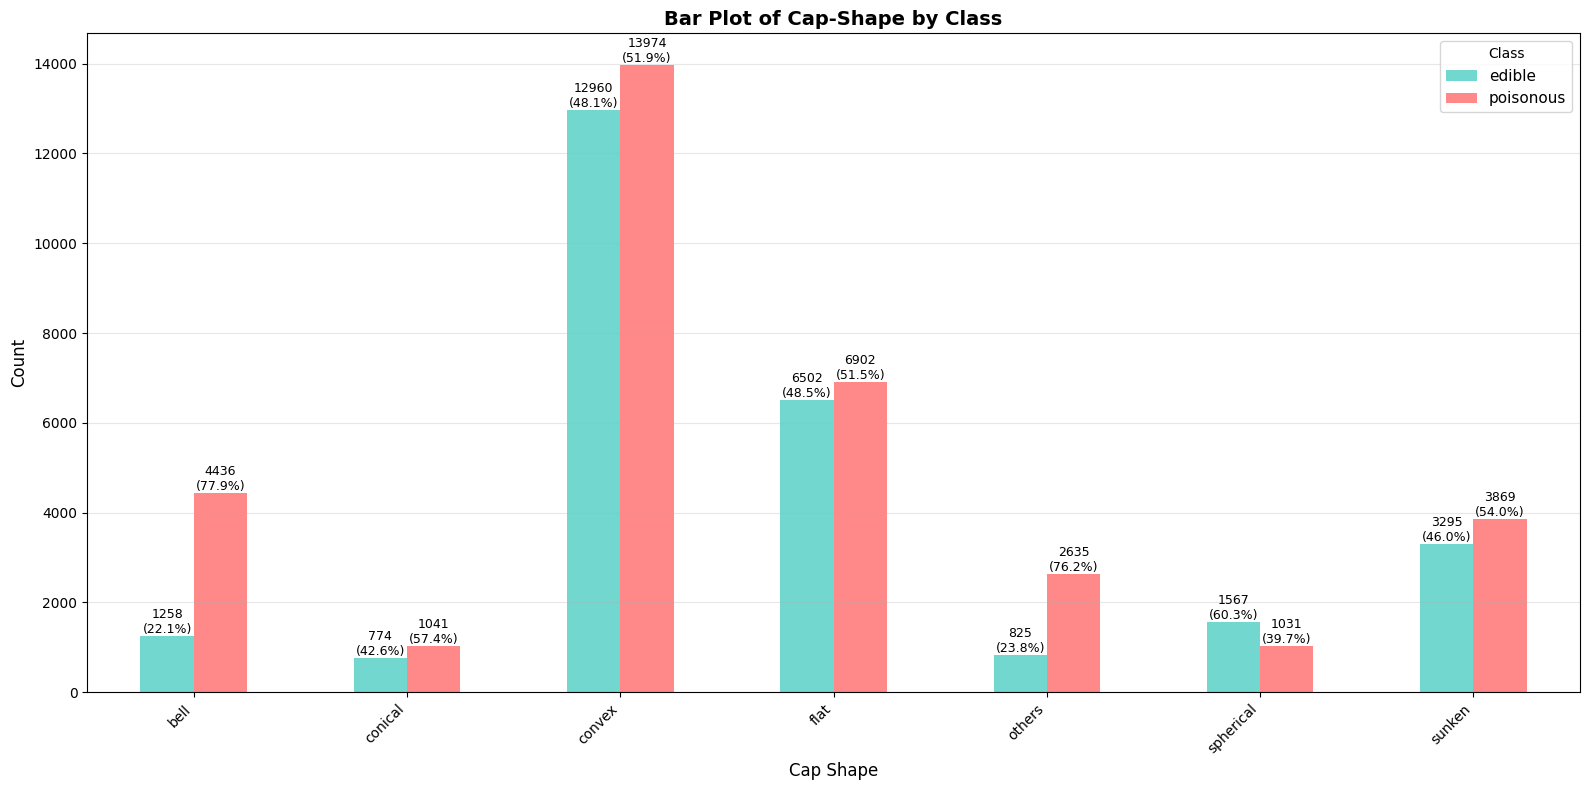

In [57]:
plot_bar_by_class(df, 'cap-shape')

### cap-color


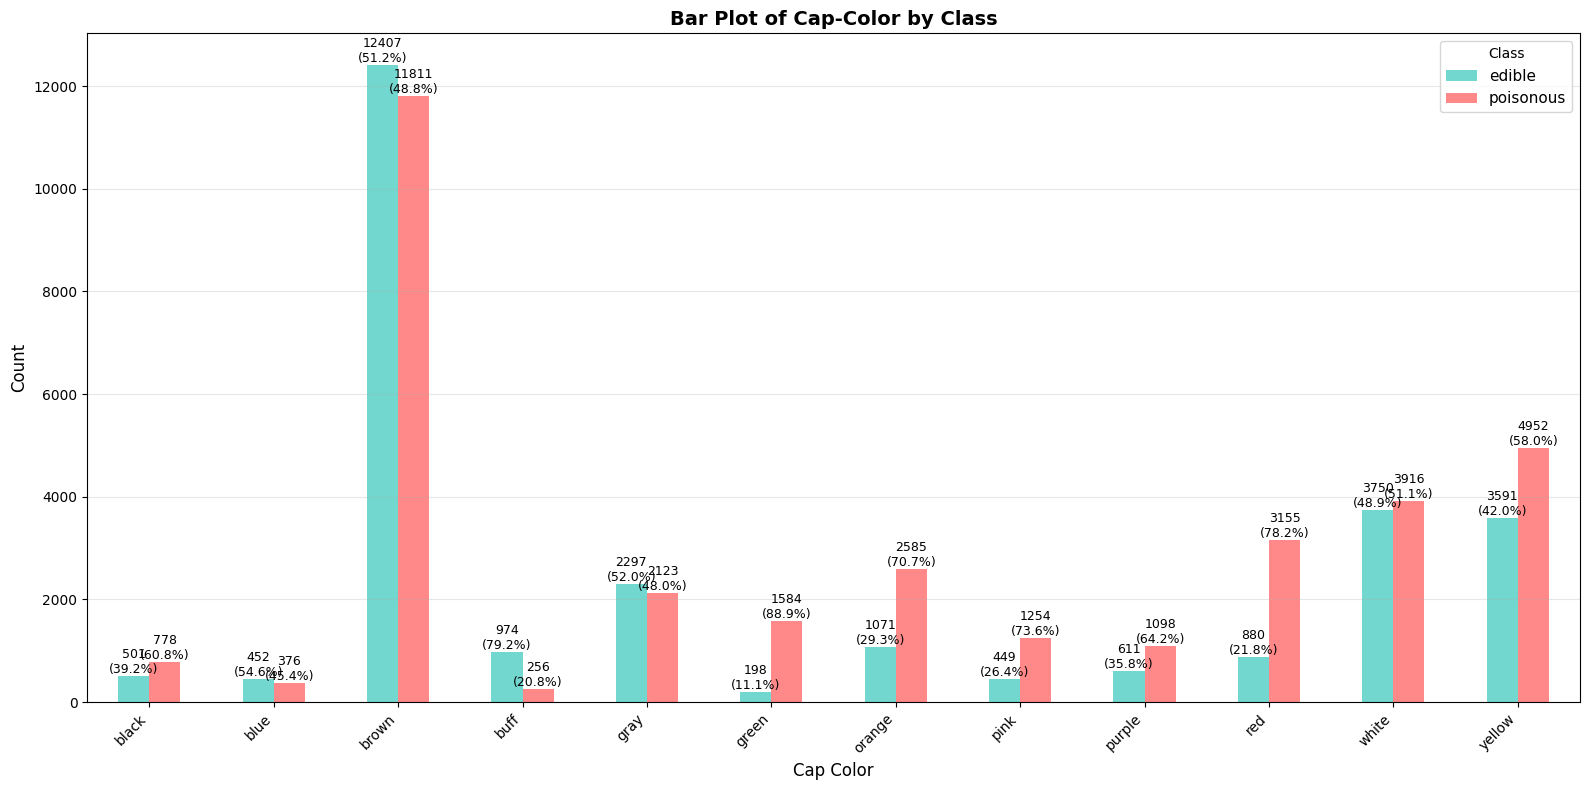

In [58]:
plot_bar_by_class(df, 'cap-color')

### does-bruise-or-bleed


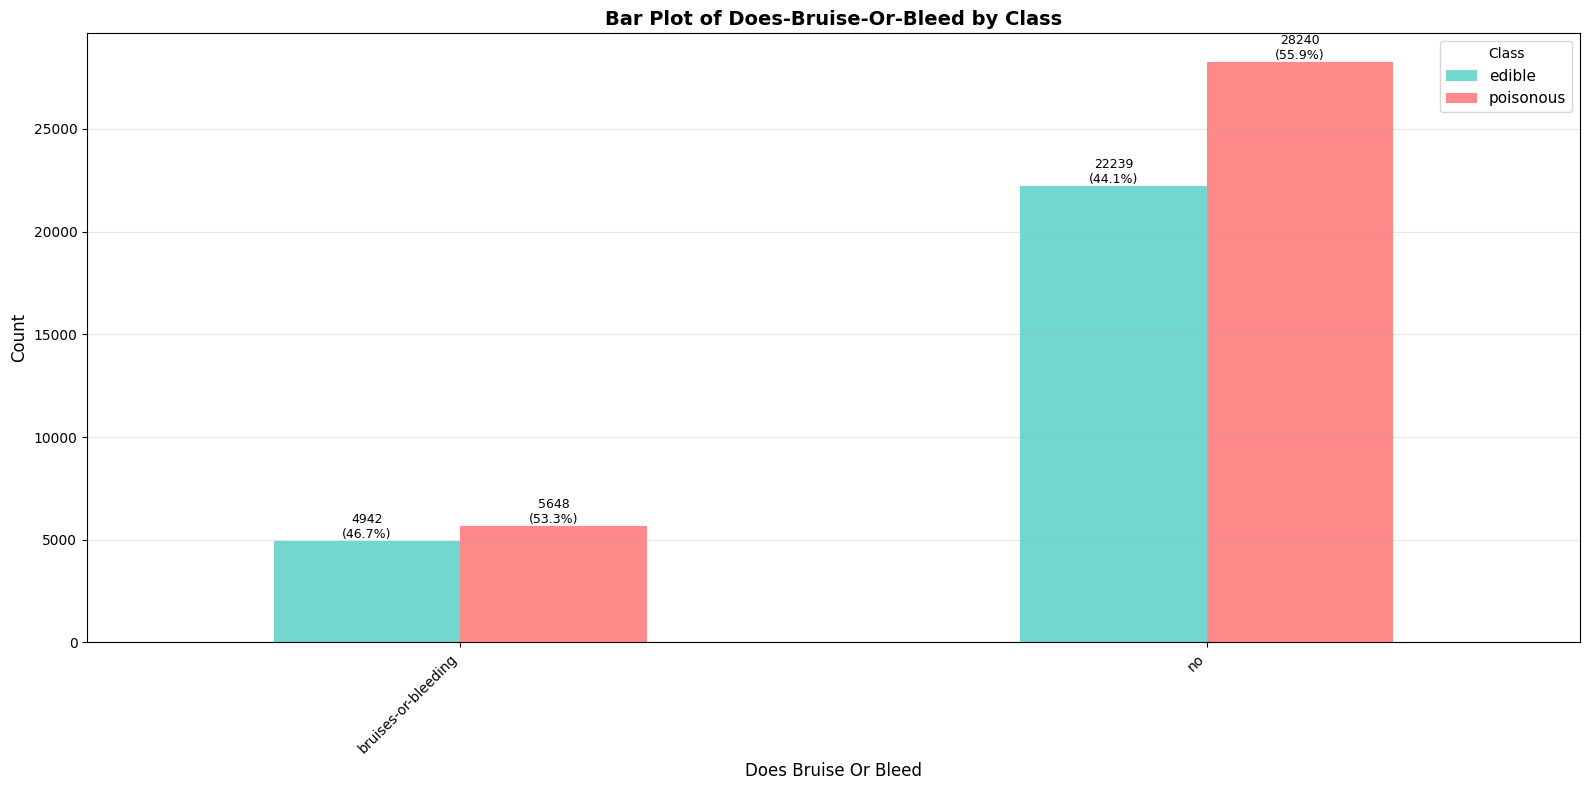

In [59]:
plot_bar_by_class(df, 'does-bruise-or-bleed')

### gill-attachment


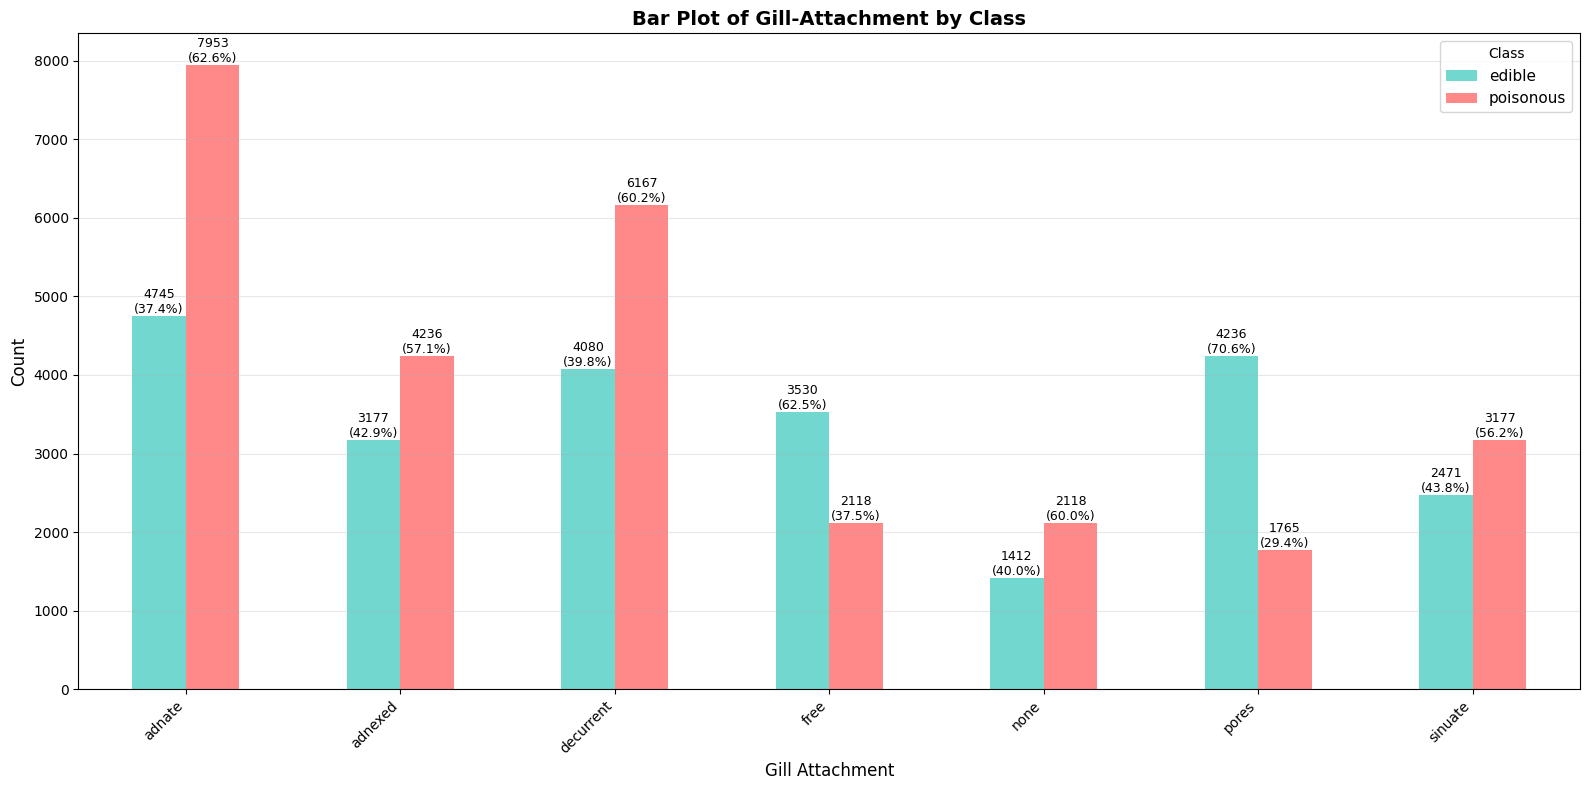

In [60]:
plot_bar_by_class(df, 'gill-attachment')

### gill-spacing


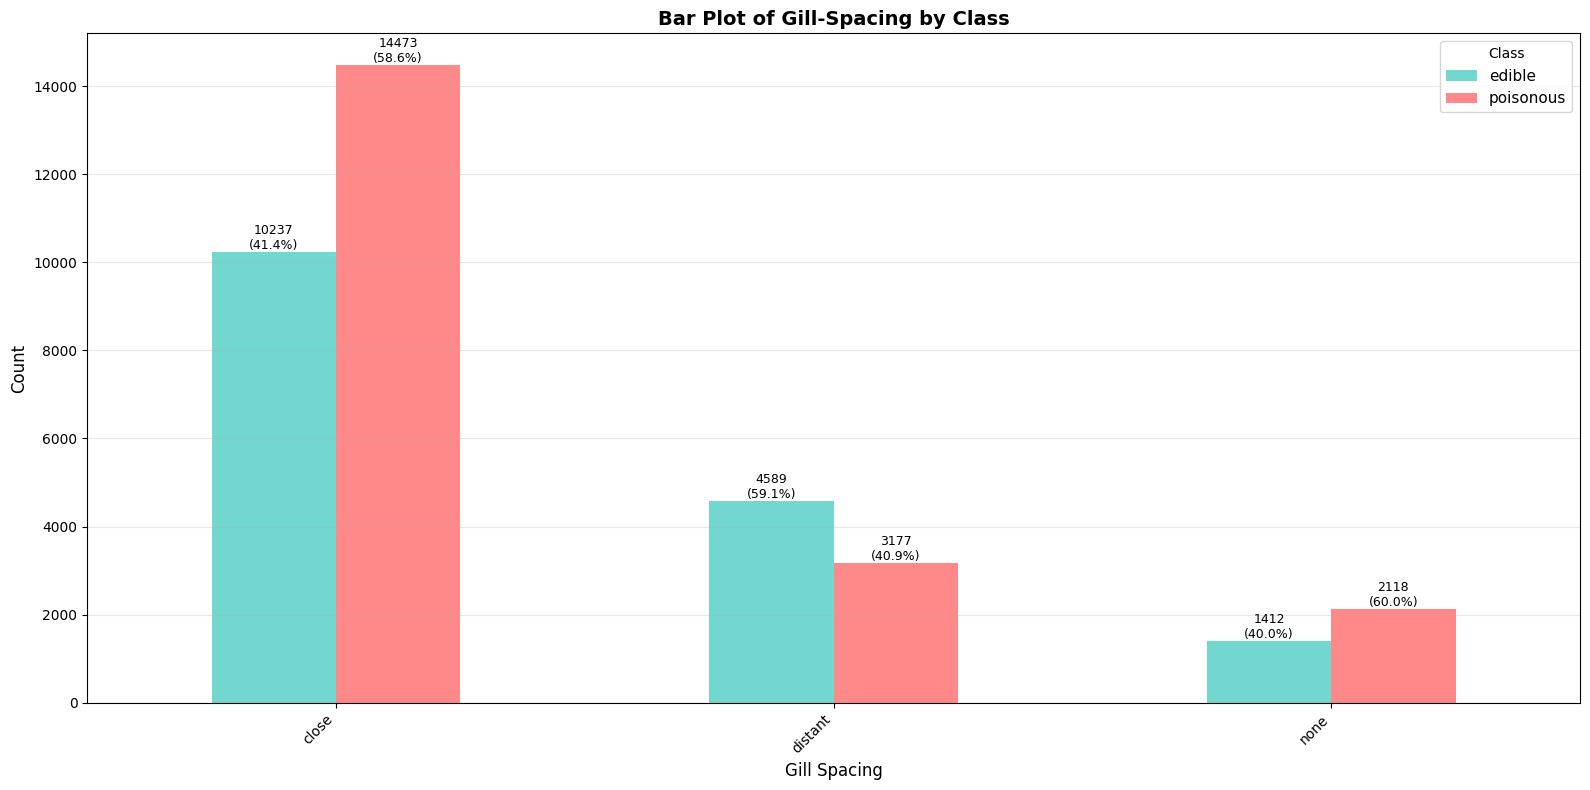

In [61]:
plot_bar_by_class(df, 'gill-spacing')

### gill-color


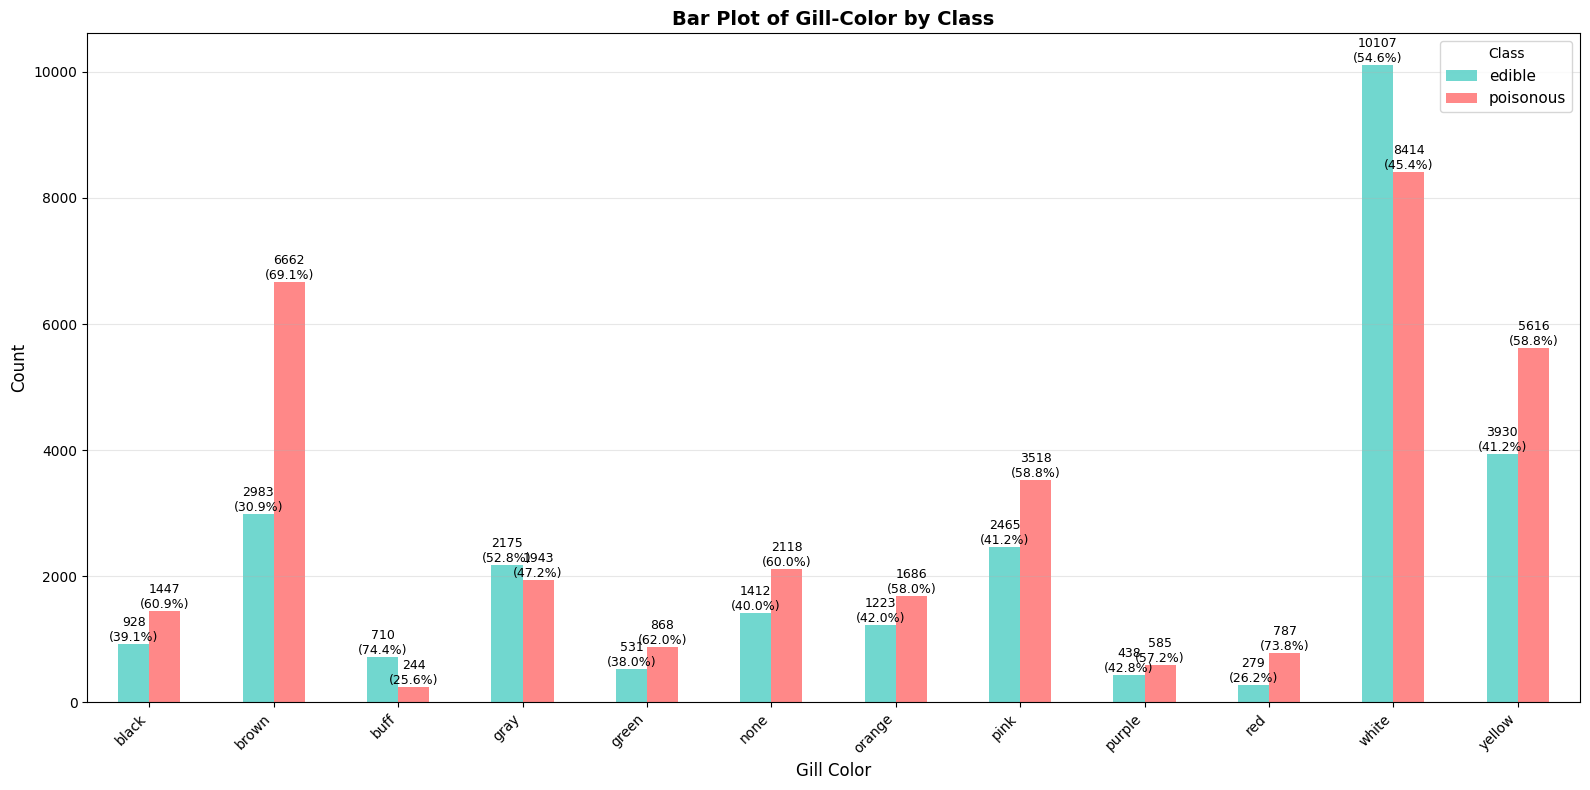

In [62]:
plot_bar_by_class(df, 'gill-color')

### stem-height


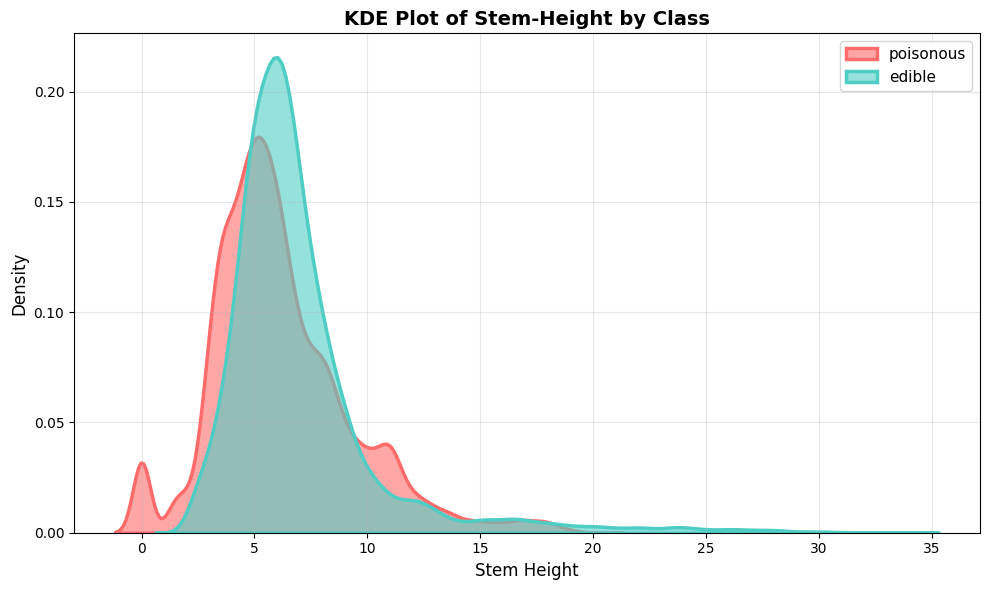

In [63]:
plot_kde_by_class(df, 'stem-height')

### stem-width


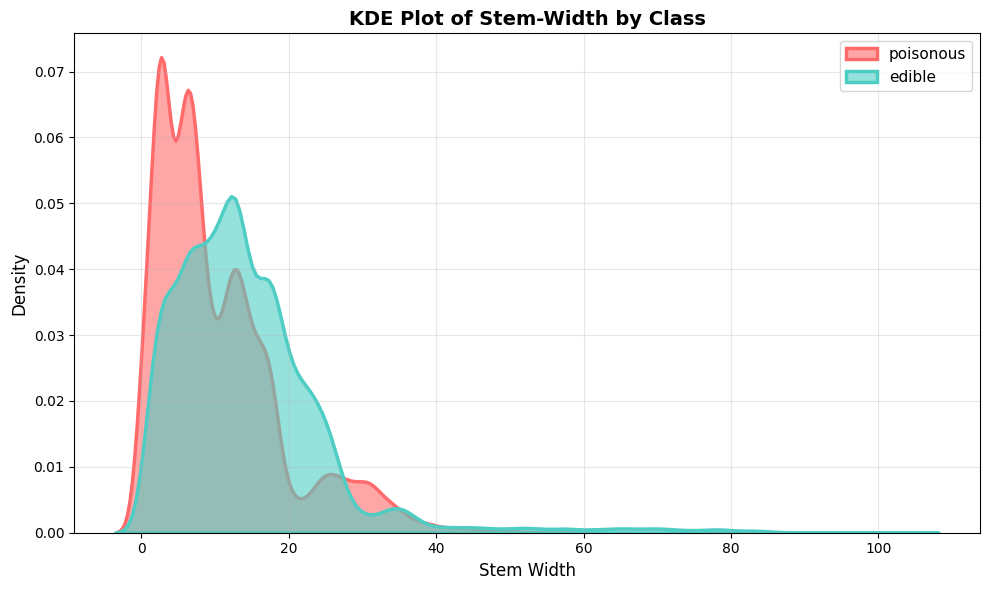

In [64]:
plot_kde_by_class(df, 'stem-width')

### stem-root


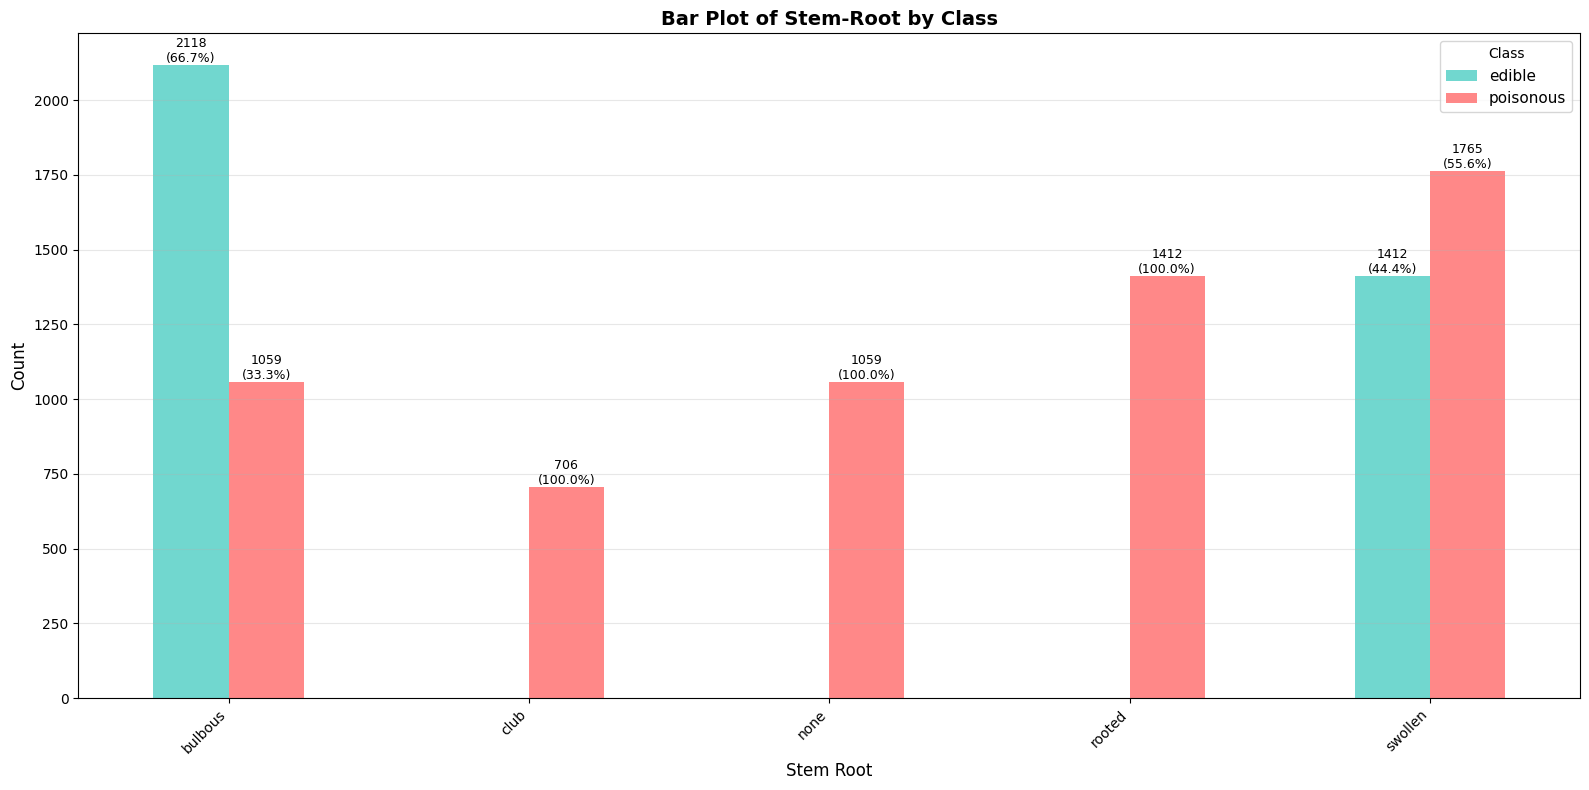

In [65]:
plot_bar_by_class(df, 'stem-root')

### stem-surface


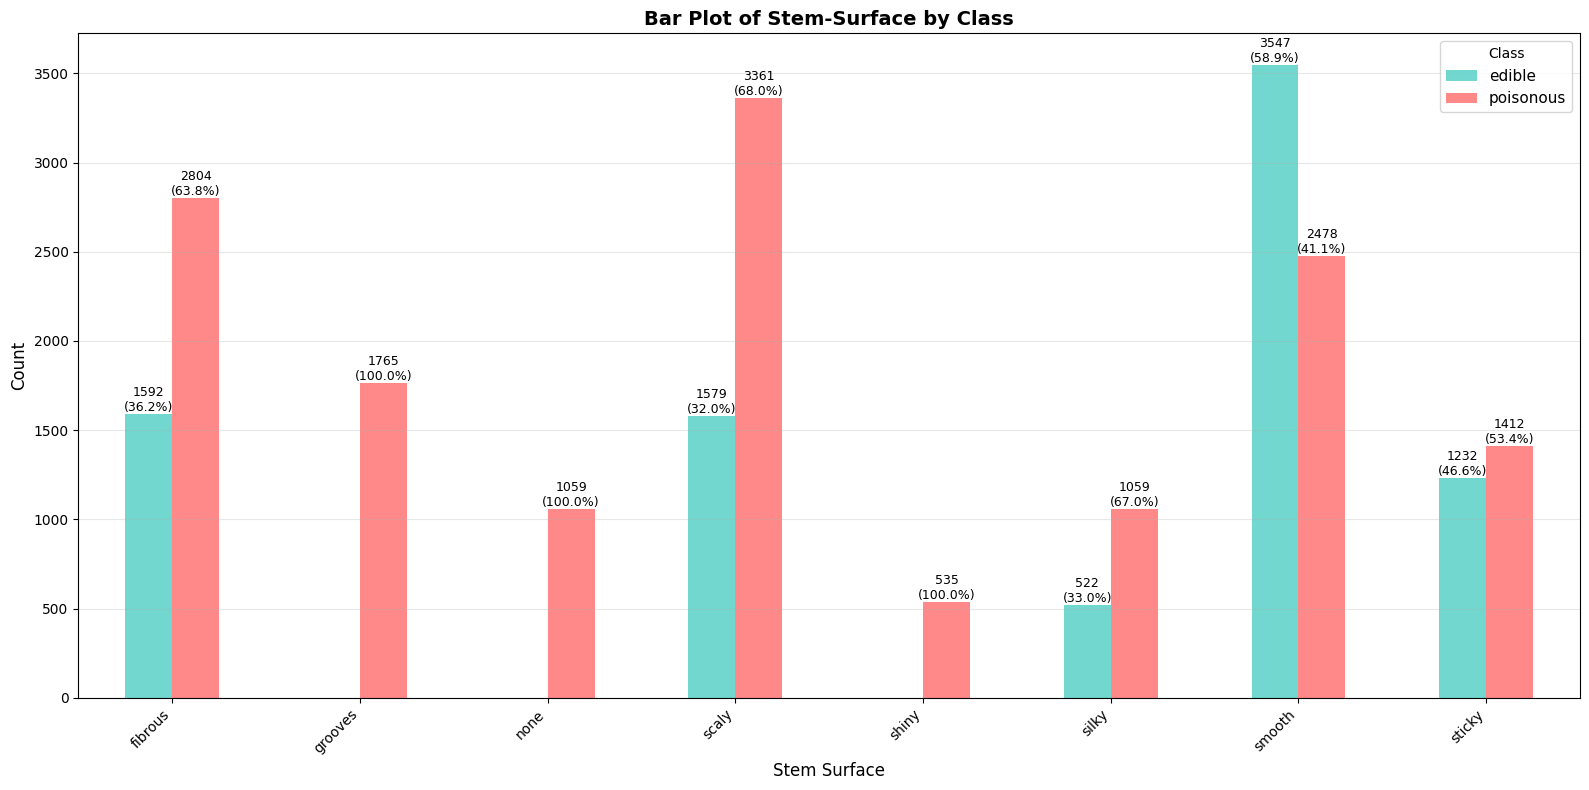

In [66]:
plot_bar_by_class(df, 'stem-surface')

### stem-color


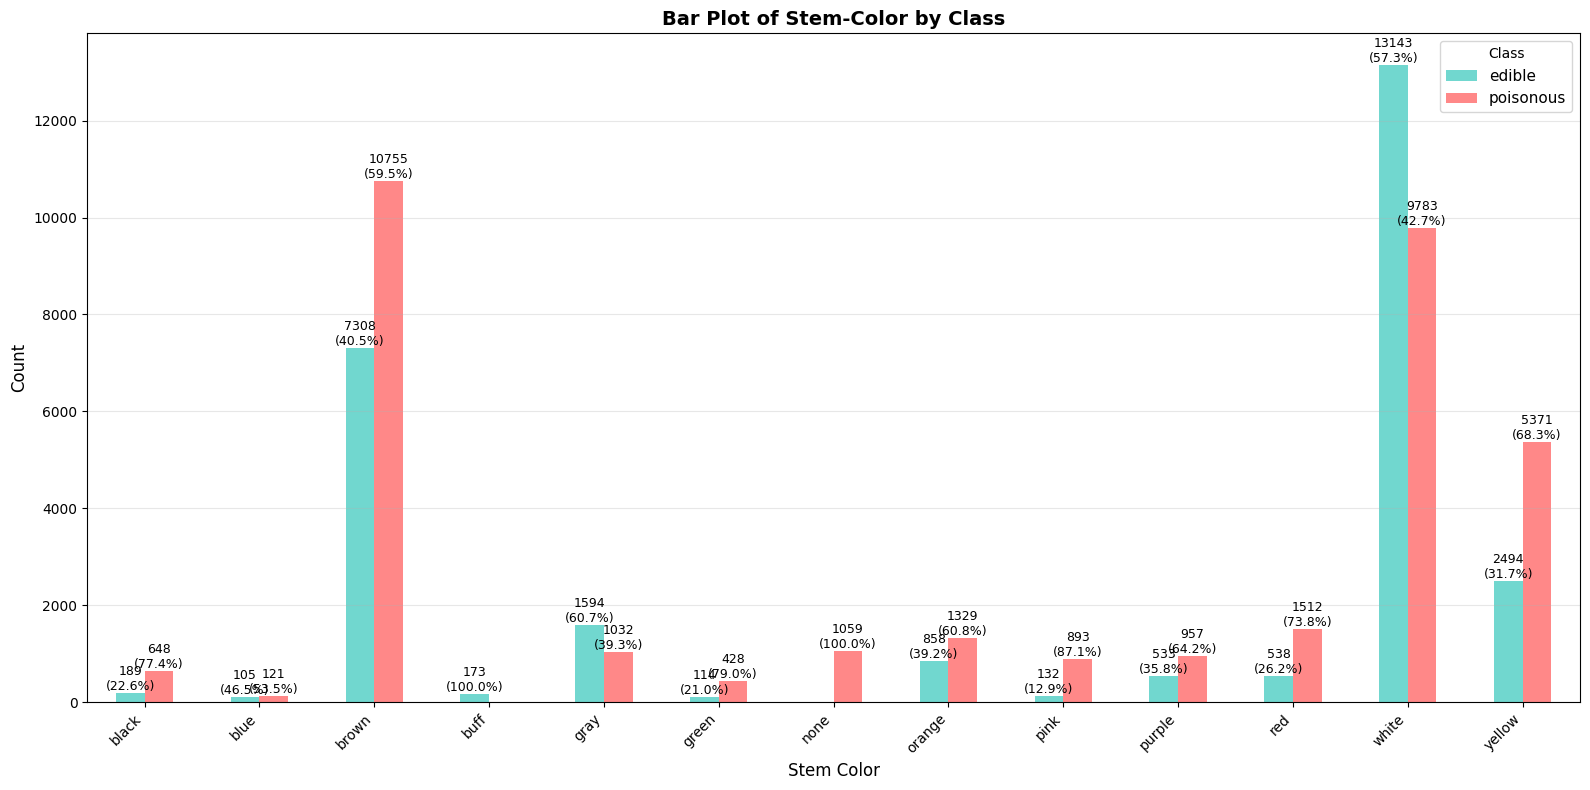

In [67]:
plot_bar_by_class(df, 'stem-color')

### veil-type


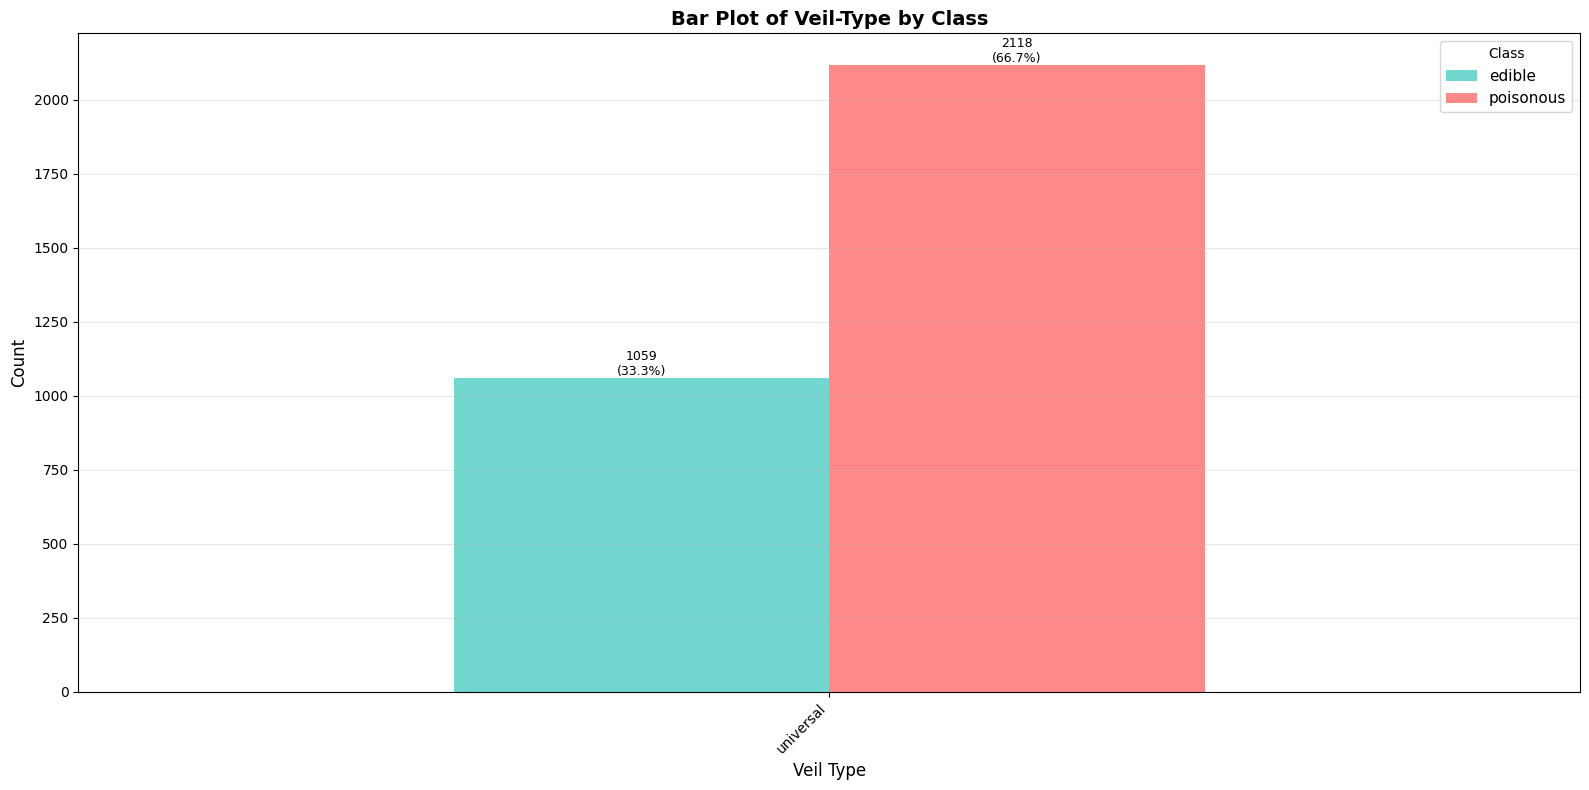

In [68]:
plot_bar_by_class(df, 'veil-type')

### veil-color


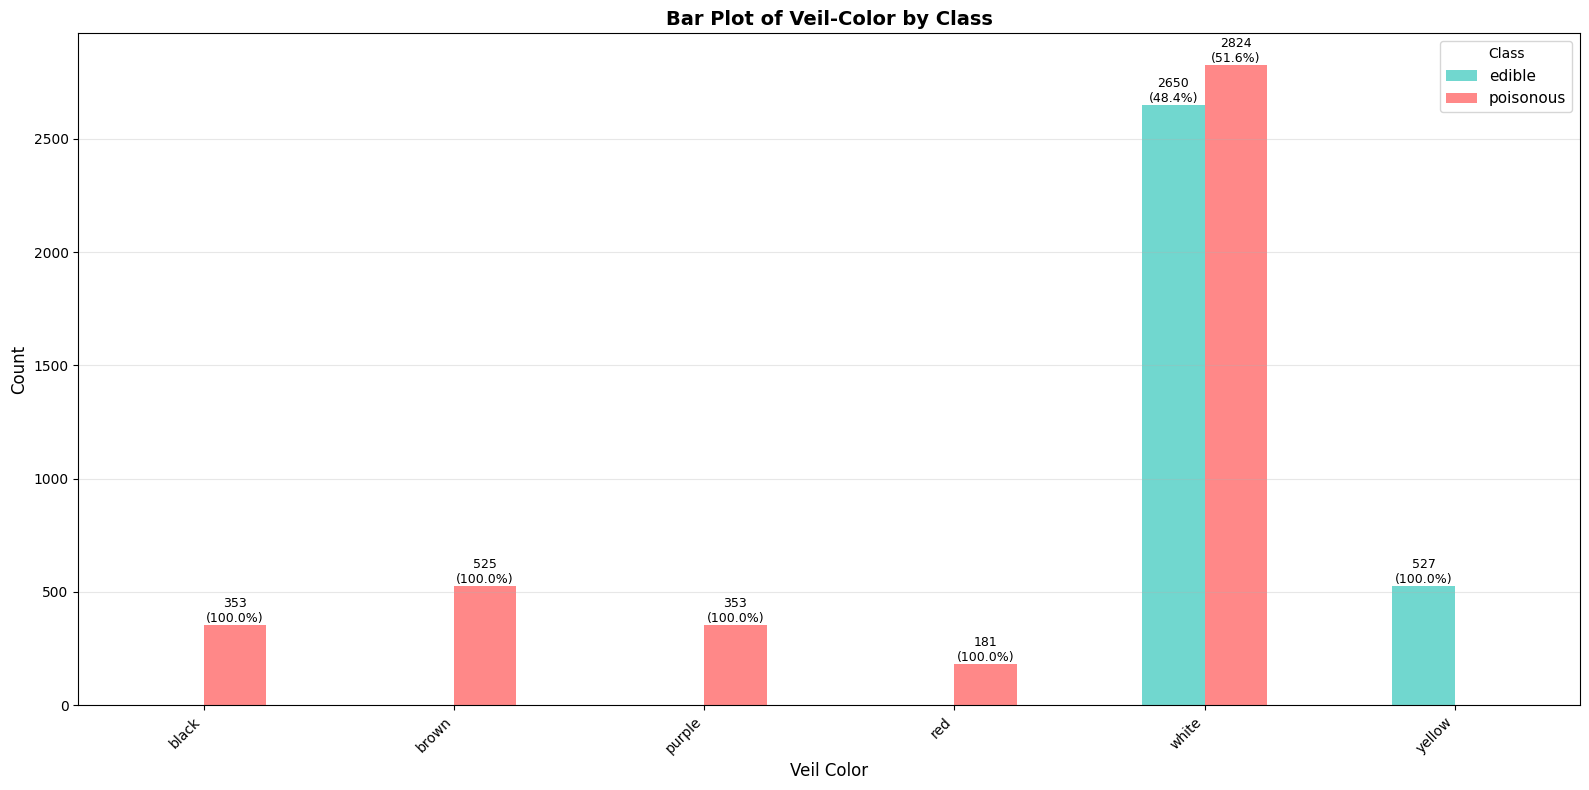

In [69]:
plot_bar_by_class(df, 'veil-color')

### has-ring


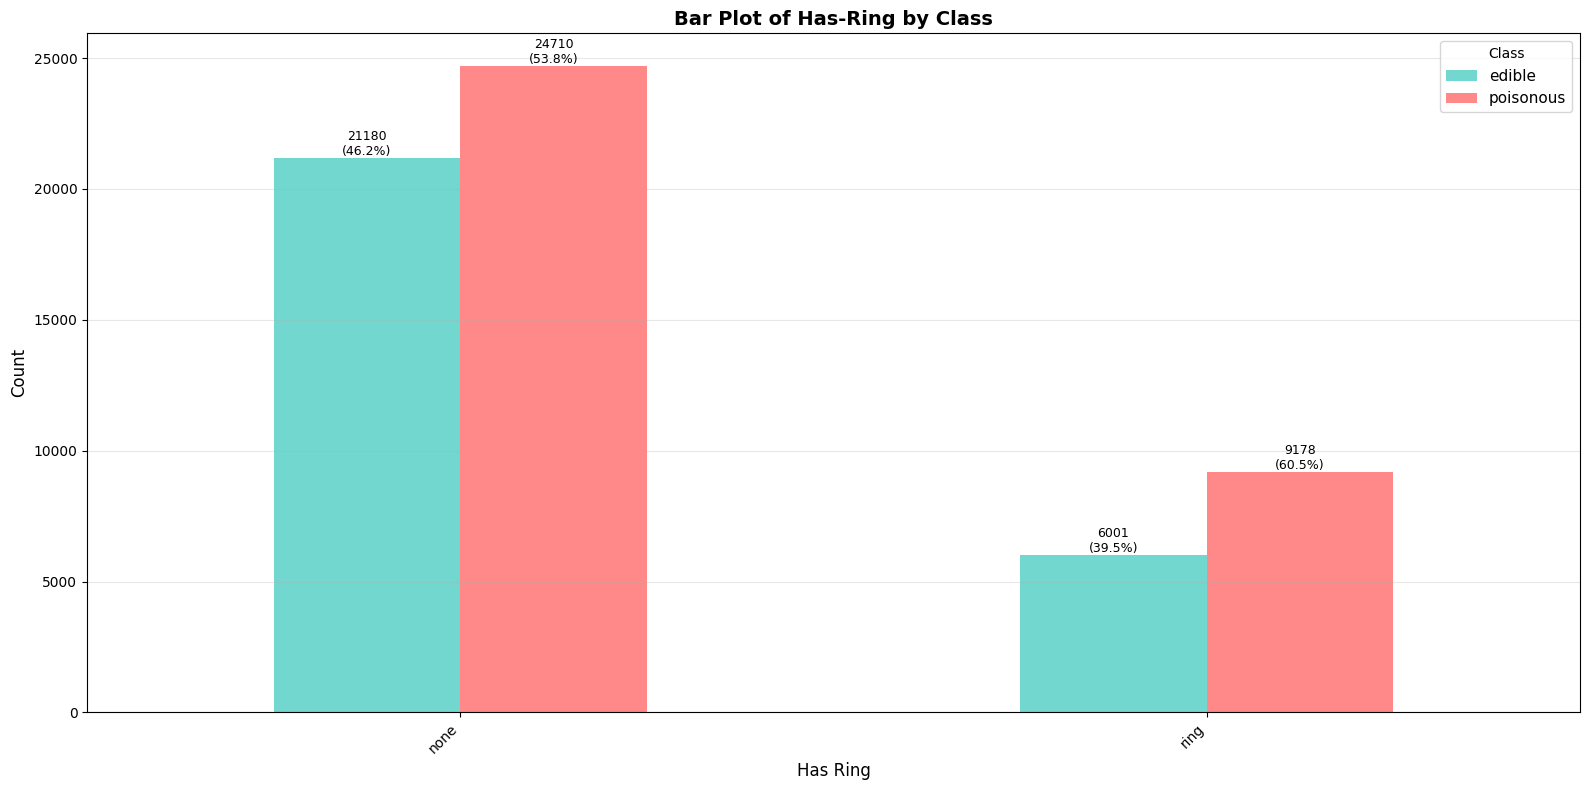

In [70]:
plot_bar_by_class(df, 'has-ring')

### ring-type


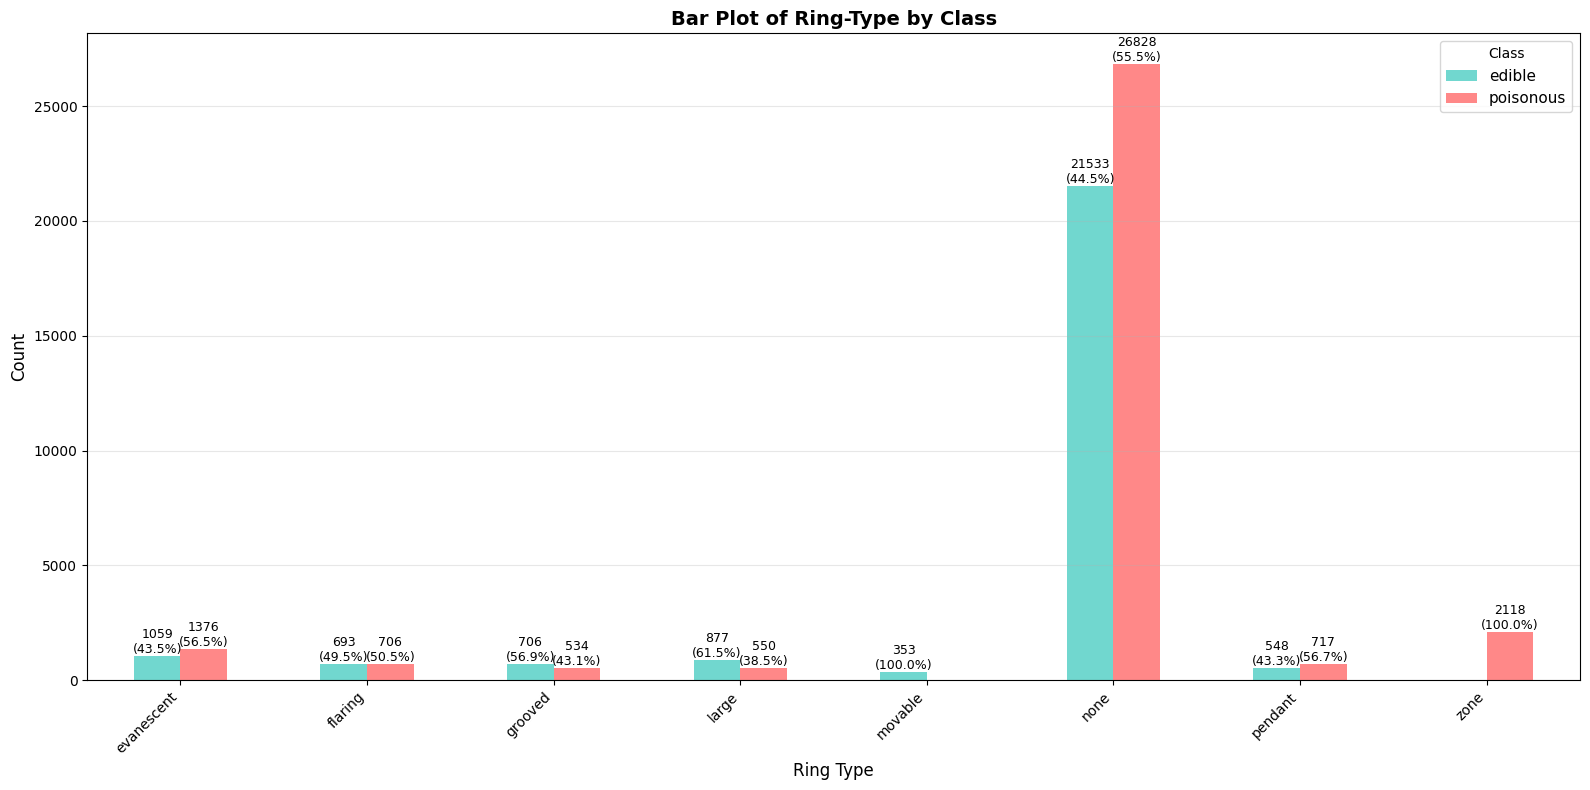

In [71]:
plot_bar_by_class(df, 'ring-type')

### spore-print-color


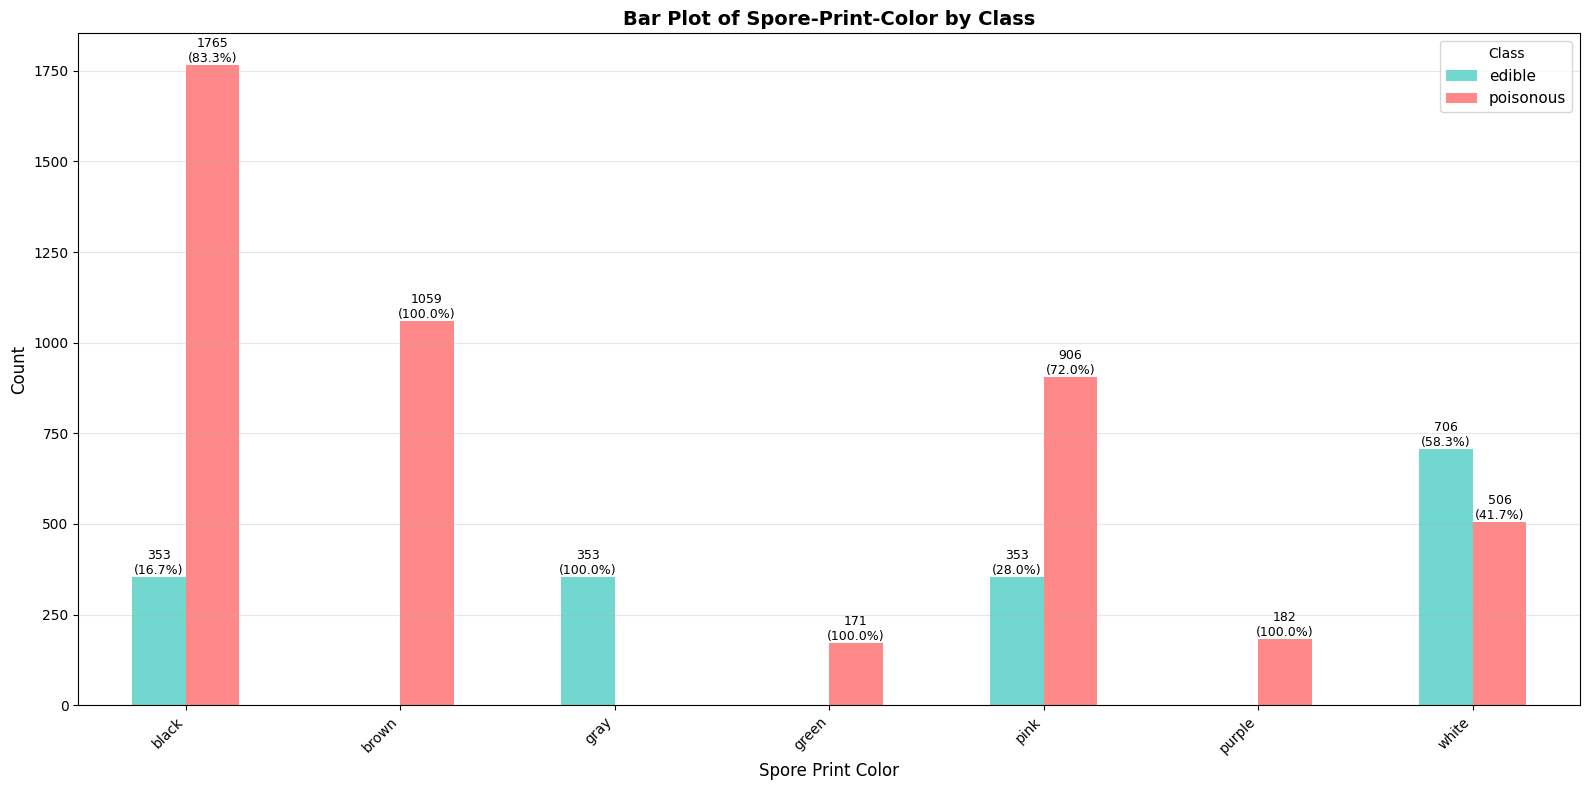

In [72]:
plot_bar_by_class(df, 'spore-print-color')

### habitat


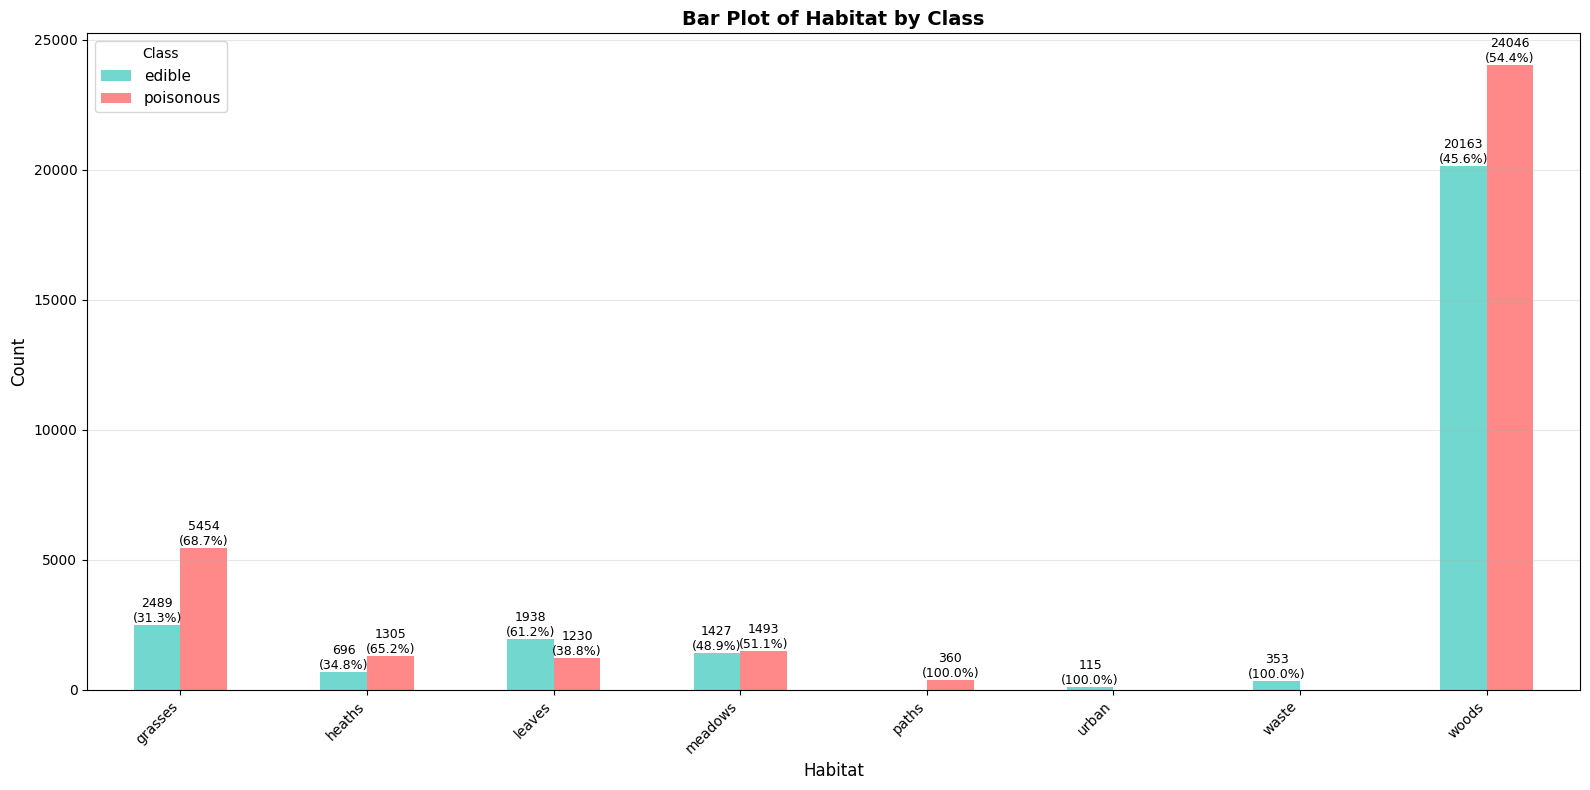

In [73]:
plot_bar_by_class(df, 'habitat')

### season


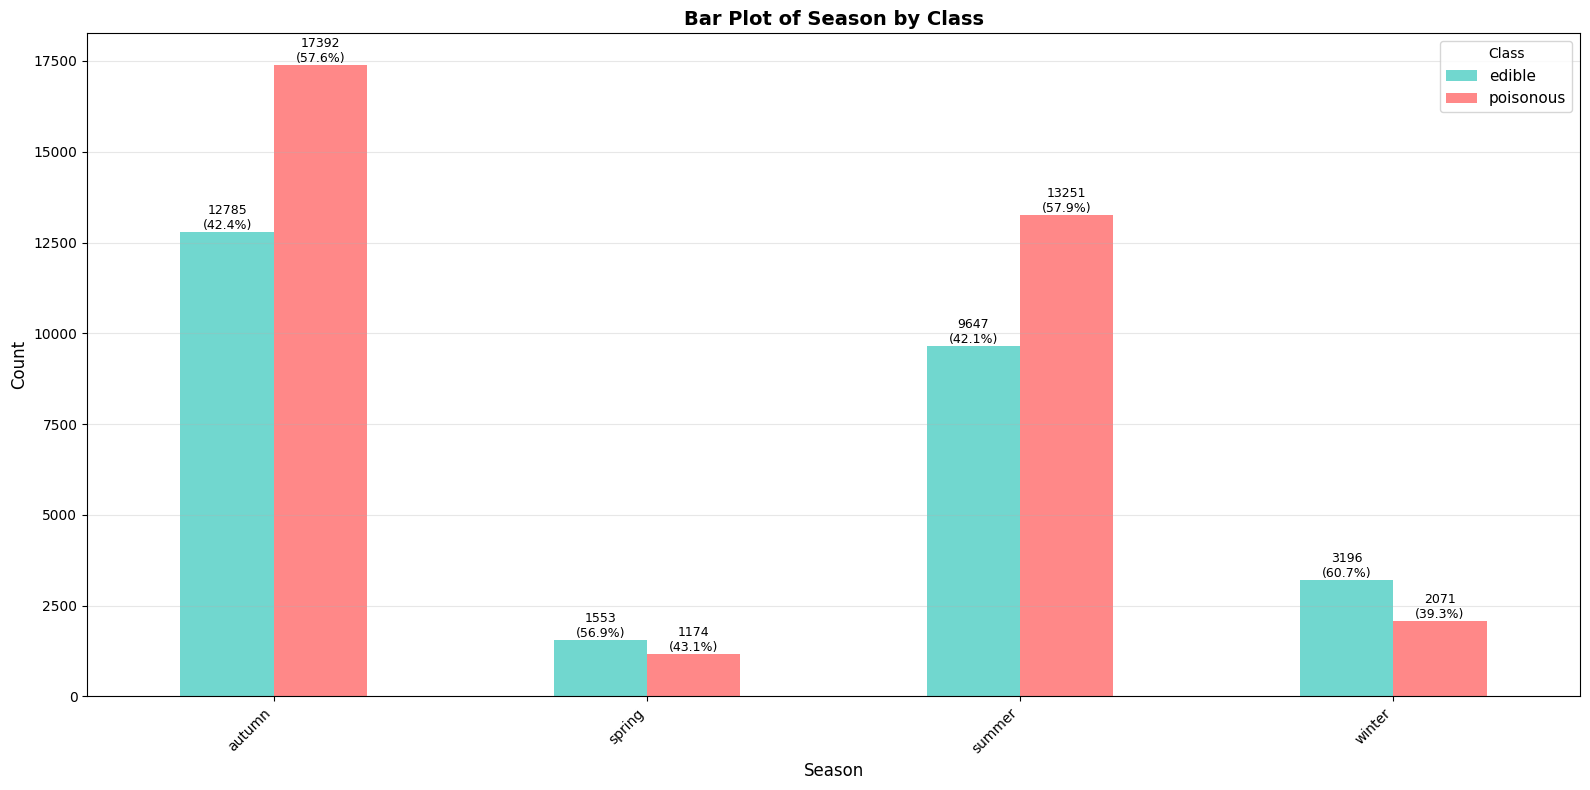

In [74]:
plot_bar_by_class(df, 'season')

### New Feature stem_ratio


In [75]:
# df['stem_ratio'] = df['stem-height'] / df['stem-width']
# plot_kde_by_class(df, 'stem_ratio')

## Multivariate


In [76]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataframe for encoding
df_corr = df.copy()

# Initialize label encoder
le = LabelEncoder()

# Get categorical columns (excluding numerical columns)
categorical_columns = df_corr.select_dtypes(include=['object']).columns

# Apply label encoding to all categorical columns
for column in categorical_columns:
    # Handle missing values by filling with 'unknown' first
    df_corr[column] = df_corr[column]
    # Convert stem_ratio to numeric if it's mixed type
    if column == 'stem_ratio':
        df_corr[column] = pd.to_numeric(df_corr[column], errors='coerce')
        continue

    # Skip numeric columns that shouldn't be encoded
    if df_corr[column].dtype in ['float64', 'int64']:
        continue

    df_corr[column] = le.fit_transform(df_corr[column])

# Now calculate correlation matrix with encoded data
df_corr = df_corr.corr()

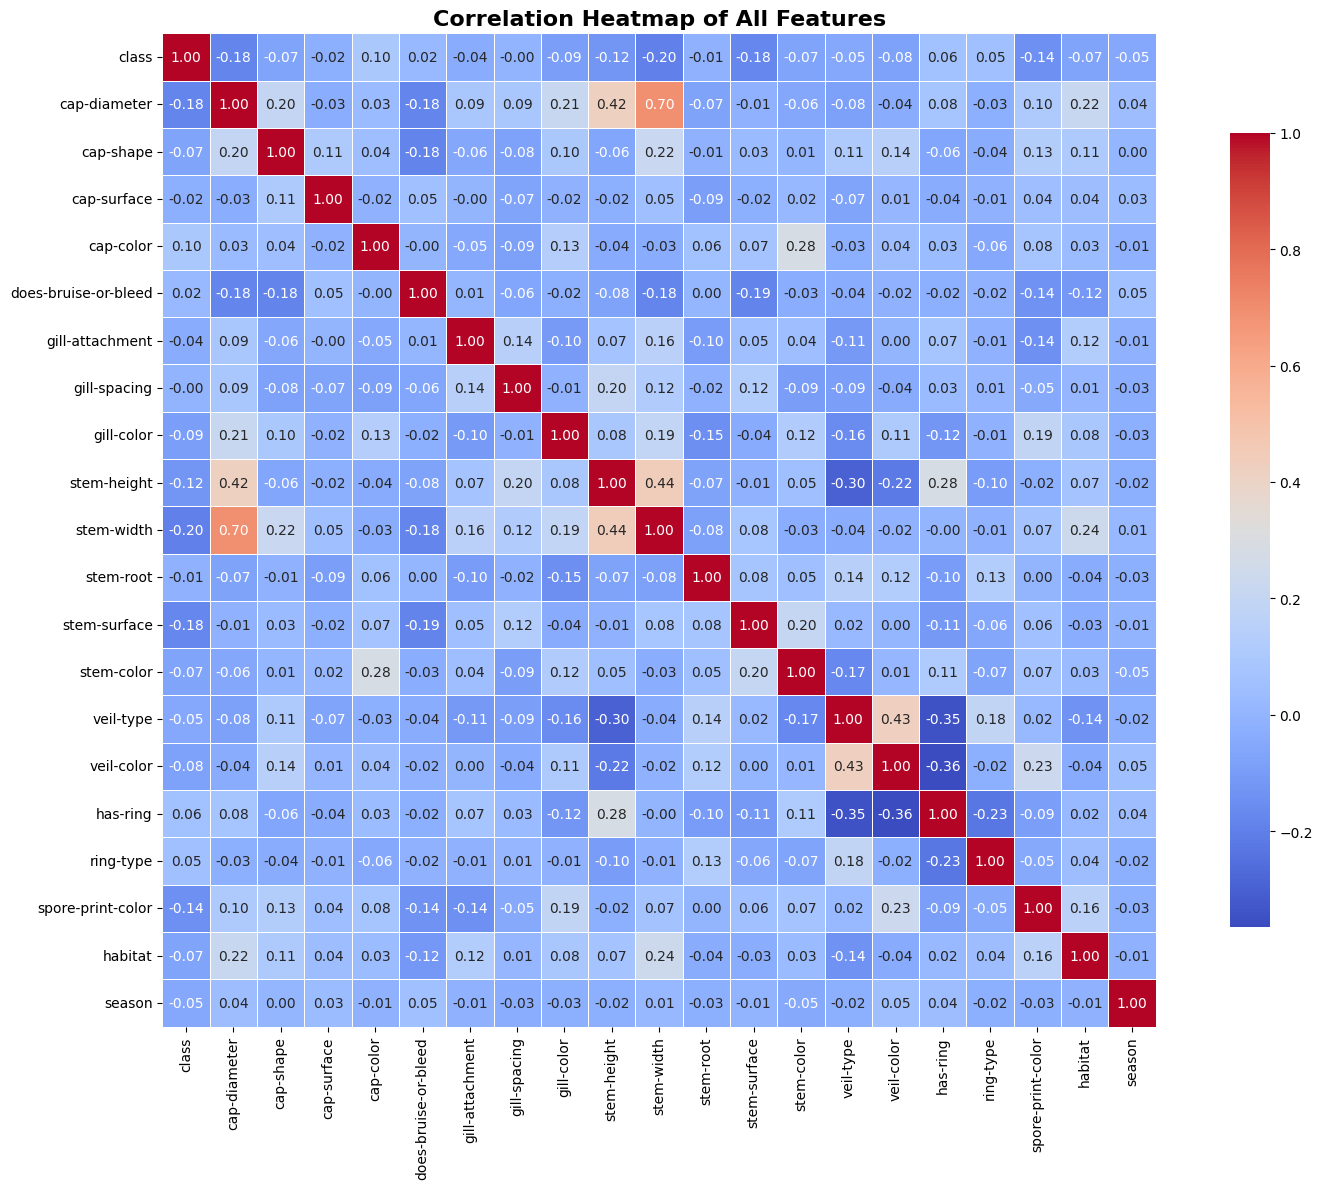

In [77]:
plt.figure(figsize=(16, 12))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, linewidths=0.5)
plt.title('Correlation Heatmap of All Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Preprocessing


In [78]:
df.drop_duplicates(inplace=True)
round(df.isna().sum() / len(df) * 100, 2).sort_values(ascending=False)

veil-type               94.79
spore-print-color       89.62
veil-color              87.83
stem-root               84.59
stem-surface            62.57
gill-spacing            41.14
cap-surface             23.18
gill-attachment         16.18
ring-type                4.06
class                    0.00
stem-color               0.00
habitat                  0.00
has-ring                 0.00
stem-width               0.00
cap-diameter             0.00
stem-height              0.00
gill-color               0.00
does-bruise-or-bleed     0.00
cap-color                0.00
cap-shape                0.00
season                   0.00
dtype: float64

In [79]:
df['gill-spacing'].fillna('none', inplace=True) # here we assume 'none' means no gill spacing
df['ring-type'].fillna('none', inplace=True) # here we assume 'none' means no ring
df = df[df['cap-surface'].notna()] # too much missing data
df = df[df['gill-attachment'].notna()] # too much missing data
df.drop(columns=['stem-root', 'veil-type', 'veil-color', 'spore-print-color', 'stem-surface'], inplace=True) # too much missing data and not very informative

In [80]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataframe for encoding
df_encoded = df.copy()

# Initialize label encoder
le = LabelEncoder()

# Get categorical columns (excluding numerical columns)
categorical_columns = df_encoded.select_dtypes(include=['object']).columns

# Apply label encoding to all categorical columns
for column in categorical_columns:
    df_encoded[column] = le.fit_transform(df_encoded[column])

print(f"Encoded dataframe shape: {df_encoded.shape}")
print(f"Categorical columns encoded: {list(categorical_columns)}")
df_encoded.head()

Encoded dataframe shape: (38713, 16)
Categorical columns encoded: ['class', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season']


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1,15.26,2,3,6,1,3,2,10,16.95,17.09,10,1,2,6,3
1,1,16.60,2,3,6,1,3,2,10,17.99,18.19,10,1,2,6,2
2,1,14.07,2,3,6,1,3,2,10,17.80,17.74,10,1,2,6,3
3,1,14.17,3,6,9,1,3,2,10,15.77,15.98,10,1,5,6,3
4,1,14.64,2,6,6,1,3,2,10,16.53,17.20,10,1,5,6,3


In [81]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Training target distribution:\n{y_train.value_counts()}")
print(f"Test target distribution:\n{y_test.value_counts()}")

Training set size: (30970, 15)
Test set size: (7743, 15)
Training target distribution:
1    16523
0    14447
Name: class, dtype: int64
Test target distribution:
1    4187
0    3556
Name: class, dtype: int64


# Modeling & Evaluation


## Random Forest


In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.model_selection import StratifiedKFold
import numpy as np
import joblib
import os
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

# Create directory if it doesn't exist
os.makedirs('model_result/Random_Forest', exist_ok=True)

# Inisialisasi model dan cross-validator
rf_model = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# List untuk menyimpan hasil metrik
train_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'mcc': []}
val_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'mcc': []}

for train_idx, val_idx in skf.split(X_train, y_train):
    X_train_cv, X_val_cv = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Print training data info before SMOTE
    print('Fold', len(train_metrics['accuracy']) + 1)
    # Apply SMOTE to training data
    X_train_cv_smote, y_train_cv_smote = smote.fit_resample(X_train_cv, y_train_cv)
    print(f"Before SMOTE: {len(X_train_cv)} ->", f"After SMOTE: {len(X_train_cv_smote)}")
    print('-' * 50)

    # Train model on SMOTE-resampled data
    rf_model.fit(X_train_cv_smote, y_train_cv_smote)

    # Prediksi train dan val (using original training data for train metrics, not SMOTE data)
    y_train_pred = rf_model.predict(X_train_cv)
    y_val_pred = rf_model.predict(X_val_cv)

    # Train metrics
    train_metrics['accuracy'].append(accuracy_score(y_train_cv, y_train_pred))
    train_metrics['precision'].append(precision_score(y_train_cv, y_train_pred))
    train_metrics['recall'].append(recall_score(y_train_cv, y_train_pred))
    train_metrics['f1'].append(f1_score(y_train_cv, y_train_pred))
    train_metrics['mcc'].append(matthews_corrcoef(y_train_cv, y_train_pred))

    # val metrics
    val_metrics['accuracy'].append(accuracy_score(y_val_cv, y_val_pred))
    val_metrics['precision'].append(precision_score(y_val_cv, y_val_pred))
    val_metrics['recall'].append(recall_score(y_val_cv, y_val_pred))
    val_metrics['f1'].append(f1_score(y_val_cv, y_val_pred))
    val_metrics['mcc'].append(matthews_corrcoef(y_val_cv, y_val_pred))

    # Save the model for this fold
    fold_num = len(train_metrics['accuracy'])
    joblib.dump(rf_model, f'model_result/Random_Forest/Fold_{fold_num}.pkl')


Fold 1
Before SMOTE: 24776 -> After SMOTE: 26436
--------------------------------------------------
Fold 2
Before SMOTE: 24776 -> After SMOTE: 26436
--------------------------------------------------
Fold 3
Before SMOTE: 24776 -> After SMOTE: 26436
--------------------------------------------------
Fold 4
Before SMOTE: 24776 -> After SMOTE: 26438
--------------------------------------------------
Fold 5
Before SMOTE: 24776 -> After SMOTE: 26438
--------------------------------------------------


### Train & Val Metric


In [83]:
train_metrics_df = pd.DataFrame(train_metrics)
train_metrics_df.index = [f'Fold {i+1}' for i in range(len(train_metrics_df))]
print("\nTrain Metrics per Fold:")
display(train_metrics_df)

val_metrics_df = pd.DataFrame(val_metrics)
val_metrics_df.index = [f'Fold {i+1}' for i in range(len(val_metrics_df))]
print("val Metrics per Fold:")
display(val_metrics_df)


Train Metrics per Fold:


,accuracy,precision,recall,f1,mcc
Fold 1,0.998063,0.998939,0.997428,0.998183,0.996110
Fold 2,0.995964,0.999163,0.993267,0.996206,0.991915
Fold 3,0.994390,0.998096,0.991375,0.994724,0.988760
Fold 4,0.991564,0.997248,0.986913,0.992054,0.983126
Fold 5,0.997296,0.999620,0.995310,0.997460,0.994579


val Metrics per Fold:


,accuracy,precision,recall,f1,mcc
Fold 1,0.996933,0.998786,0.995461,0.997121,0.993845
Fold 2,0.994834,0.998781,0.991528,0.995141,0.989656
Fold 3,0.992735,0.997254,0.989107,0.993164,0.985450
Fold 4,0.989990,0.995719,0.985472,0.990569,0.979965
Fold 5,0.996125,0.998783,0.993947,0.996359,0.992232


### Test


In [84]:
# Load all models from the Random Forest directory
model_dir = 'model_result/Random_Forest'
models = []

# Load all saved models
for i in range(1, 6):  # Assuming 5 folds
    model_path = os.path.join(model_dir, f'Fold_{i}.pkl')
    if os.path.exists(model_path):
        model = joblib.load(model_path)
        models.append((f'Fold_{i}', model))

# Test all loaded models on the test set
test_results = []

for model_name, model in models:
    # Make predictions on test set
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    mcc = matthews_corrcoef(y_test, y_test_pred)

    # Store results
    test_results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'MCC': mcc
    })

# Convert to DataFrame for better visualization
final_results_df = pd.DataFrame(test_results)
print("\nFinal Test Results for All Models:")
display(final_results_df)


Final Test Results for All Models:


,Model,Accuracy,Precision,Recall,F1-Score,MCC
0,Fold_1,0.996513,0.997608,0.995940,0.996773,0.992982
1,Fold_2,0.995092,0.998079,0.992835,0.995450,0.990140
2,Fold_3,0.993284,0.995447,0.992118,0.993780,0.986489
3,Fold_4,0.991347,0.996864,0.987103,0.991960,0.982649
4,Fold_5,0.994576,0.997599,0.992357,0.994971,0.989100


### Confusion Matrix


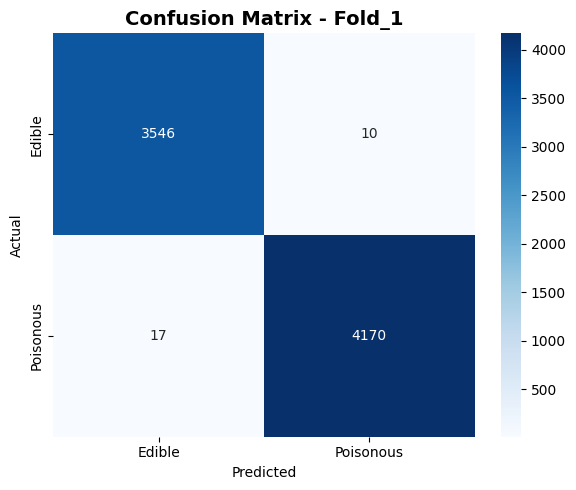

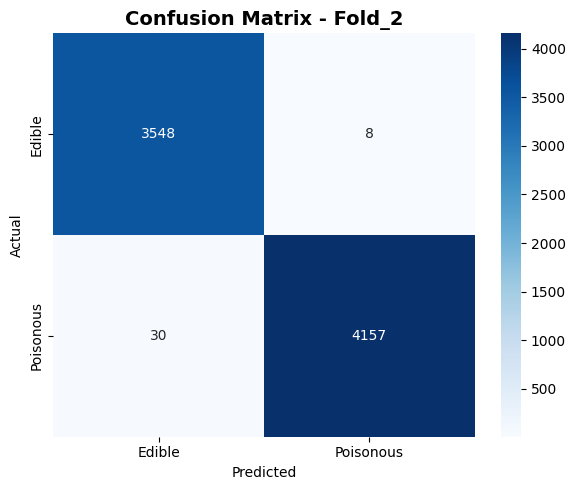

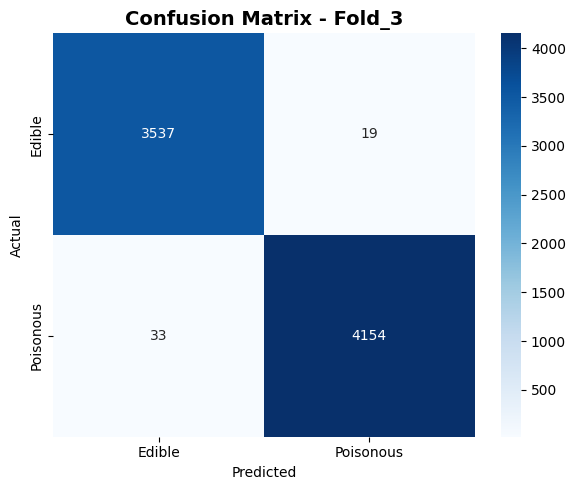

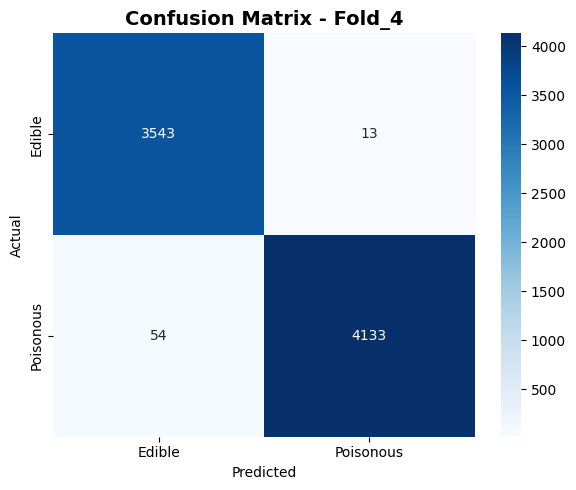

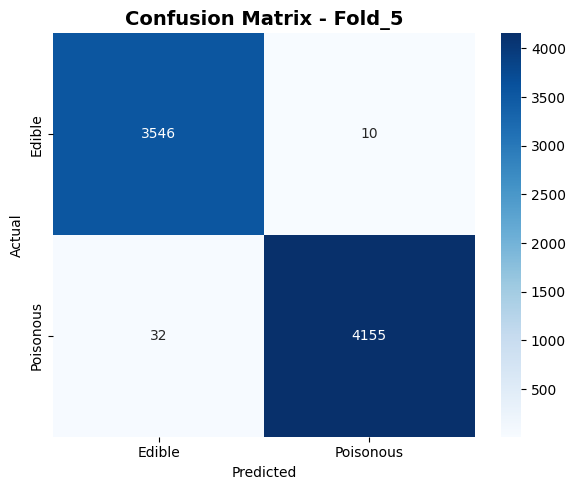


Confusion Matrix Values for Each Fold:


,Model,TN,FP,FN,TP
0,Fold_1,3546,10,17,4170
1,Fold_2,3548,8,30,4157
2,Fold_3,3537,19,33,4154
3,Fold_4,3543,13,54,4133
4,Fold_5,3546,10,32,4155


In [85]:
from sklearn.metrics import confusion_matrix

# Create individual confusion matrices for each fold
for idx, (model_name, model) in enumerate(models):
    # Make predictions on test set
    y_test_pred = model.predict(X_test)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    
    # Create individual plot
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Edible', 'Poisonous'], 
                yticklabels=['Edible', 'Poisonous'])
    plt.title(f'Confusion Matrix - {model_name}', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Also create a summary table with confusion matrix values
cm_results = []
for model_name, model in models:
    y_test_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_test_pred)
    
    cm_results.append({
        'Model': model_name,
        'TN': cm[0,0],
        'FP': cm[0,1], 
        'FN': cm[1,0],
        'TP': cm[1,1]
    })

cm_df = pd.DataFrame(cm_results)
print("\nConfusion Matrix Values for Each Fold:")
display(cm_df)


### Feature Importance


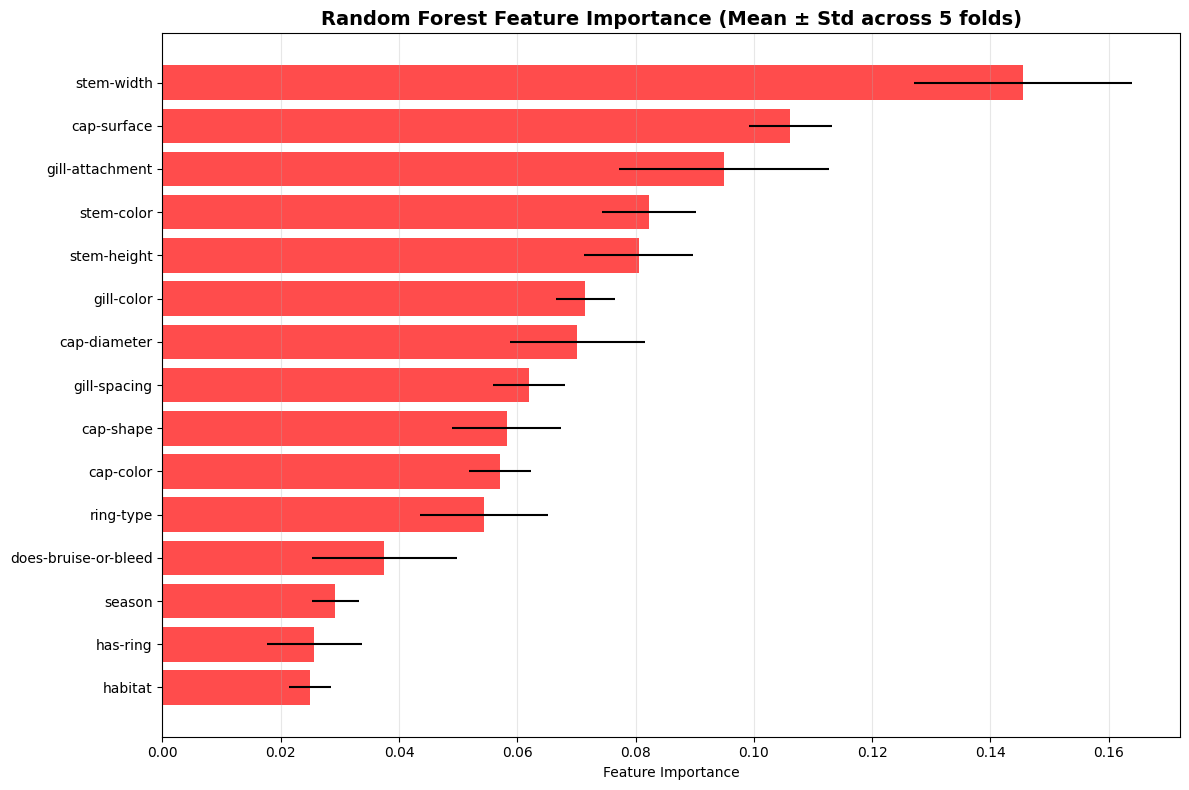

In [97]:
# Load all Random Forest models and calculate feature importance
model_dir = 'model_result/Random_Forest'
feature_importances = []

# Load all saved Random Forest models
for i in range(1, 6):  # Assuming 5 folds
    model_path = os.path.join(model_dir, f'Fold_{i}.pkl')
    if os.path.exists(model_path):
        model = joblib.load(model_path)
        # Get feature importance for this fold
        importance = model.feature_importances_
        feature_importances.append(importance)

# Convert to DataFrame for easier manipulation
feature_importance_df = pd.DataFrame(feature_importances, 
                                   columns=X.columns,
                                   index=[f'Fold_{i+1}' for i in range(len(feature_importances))])

# Calculate mean and std of feature importance across folds
mean_importance = feature_importance_df.mean()
std_importance = feature_importance_df.std()

# Create summary DataFrame
importance_summary = pd.DataFrame({
    'Feature': X.columns,
    'Mean_Importance': mean_importance.values,
    'Std_Importance': std_importance.values
}).sort_values('Mean_Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(importance_summary)), importance_summary['Mean_Importance'], xerr=importance_summary['Std_Importance'], alpha=0.7, color='red')
plt.yticks(range(len(importance_summary)), importance_summary['Feature'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance (Mean ± Std across 5 folds)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## Gradient Boosting Machine (LGBM)


In [40]:
import lightgbm as lgb

# Create directory if it doesn't exist
os.makedirs('model_result/LGBM', exist_ok=True)

# Initialize model and cross-validator
lgbm_model = lgb.LGBMClassifier(random_state=42, n_estimators=50, max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# List untuk menyimpan hasil metrik
train_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'mcc': []}
val_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'mcc': []}

for train_idx, val_idx in skf.split(X_train, y_train):
    X_train_cv, X_val_cv = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Print training data info before SMOTE
    print('Fold', len(train_metrics['accuracy']) + 1)
    # Apply SMOTE to training data
    X_train_cv_smote, y_train_cv_smote = smote.fit_resample(X_train_cv, y_train_cv)
    print(f"Before SMOTE: {len(X_train_cv)} ->", f"After SMOTE: {len(X_train_cv_smote)}")
    print('-' * 50)

    # Train model on SMOTE-resampled data
    lgbm_model.fit(X_train_cv_smote, y_train_cv_smote)

    # Prediksi train dan val (using original training data for train metrics, not SMOTE data)
    y_train_pred = lgbm_model.predict(X_train_cv)
    y_val_pred = lgbm_model.predict(X_val_cv)

    # Train metrics
    train_metrics['accuracy'].append(accuracy_score(y_train_cv, y_train_pred))
    train_metrics['precision'].append(precision_score(y_train_cv, y_train_pred))
    train_metrics['recall'].append(recall_score(y_train_cv, y_train_pred))
    train_metrics['f1'].append(f1_score(y_train_cv, y_train_pred))
    train_metrics['mcc'].append(matthews_corrcoef(y_train_cv, y_train_pred))

    # val metrics
    val_metrics['accuracy'].append(accuracy_score(y_val_cv, y_val_pred))
    val_metrics['precision'].append(precision_score(y_val_cv, y_val_pred))
    val_metrics['recall'].append(recall_score(y_val_cv, y_val_pred))
    val_metrics['f1'].append(f1_score(y_val_cv, y_val_pred))
    val_metrics['mcc'].append(matthews_corrcoef(y_val_cv, y_val_pred))

    # Save the model for this fold
    fold_num = len(train_metrics['accuracy'])
    joblib.dump(lgbm_model, f'model_result/LGBM/Fold_{fold_num}.pkl')


Fold 1
Before SMOTE: 24776 -> After SMOTE: 26436
--------------------------------------------------
[LightGBM] [Info] Number of positive: 13218, number of negative: 13218
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 851
[LightGBM] [Info] Number of data points in the train set: 26436, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Fold 2
Before SMOTE: 24776 -> After SMOTE: 26436
--------------------------------------------------
[LightGBM] [Info] Number of positive: 13218, number of negative: 13218
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[

### Train & Val


In [41]:
train_metrics_df = pd.DataFrame(train_metrics)
train_metrics_df.index = [f'Fold {i+1}' for i in range(len(train_metrics_df))]
print("\nTrain Metrics per Fold:")
display(train_metrics_df)

val_metrics_df = pd.DataFrame(val_metrics)
val_metrics_df.index = [f'Fold {i+1}' for i in range(len(val_metrics_df))]
print("val Metrics per Fold:")
display(val_metrics_df)


Train Metrics per Fold:


,accuracy,precision,recall,f1,mcc
Fold 1,0.998184,0.999166,0.997428,0.998296,0.996353
Fold 2,0.998224,0.998864,0.997806,0.998335,0.996433
Fold 3,0.998749,0.998941,0.998714,0.998827,0.997486
Fold 4,0.998668,0.999092,0.998411,0.998751,0.997324
Fold 5,0.998547,0.999091,0.998184,0.998638,0.997081


val Metrics per Fold:


,accuracy,precision,recall,f1,mcc
Fold 1,0.998224,0.999091,0.997579,0.998335,0.996434
Fold 2,0.997578,0.998183,0.997277,0.997730,0.995135
Fold 3,0.998547,0.998789,0.998487,0.998638,0.997081
Fold 4,0.998224,0.997883,0.998789,0.998336,0.996432
Fold 5,0.996933,0.997878,0.996368,0.997123,0.993839


### Test


In [ ]:
# Load all models from the Random Forest directory
model_dir = 'model_result/LGBM'
models = []

# Load all saved models
for i in range(1, 6):  # Assuming 5 folds
    model_path = os.path.join(model_dir, f'Fold_{i}.pkl')
    if os.path.exists(model_path):
        model = joblib.load(model_path)
        models.append((f'Fold_{i}', model))

# Test all loaded models on the test set
test_results = []

for model_name, model in models:
    # Make predictions on test set
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    mcc = matthews_corrcoef(y_test, y_test_pred)

    # Store results
    test_results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'MCC': mcc
    })

# Convert to DataFrame for better visualization
final_results_df = pd.DataFrame(test_results)
print("\nFinal Test Results for All Models:")
display(final_results_df)


Final Test Results for All Models:


,Model,Accuracy,Precision,Recall,F1-Score,MCC
0,Fold_1,0.997675,0.998565,0.997134,0.997849,0.995321
1,Fold_2,0.998063,0.998804,0.997612,0.998208,0.996101
2,Fold_3,0.998321,0.998091,0.998806,0.998448,0.996620
3,Fold_4,0.998579,0.998567,0.998806,0.998687,0.997140
4,Fold_5,0.998321,0.998329,0.998567,0.998448,0.996620


### Confusion Matrix


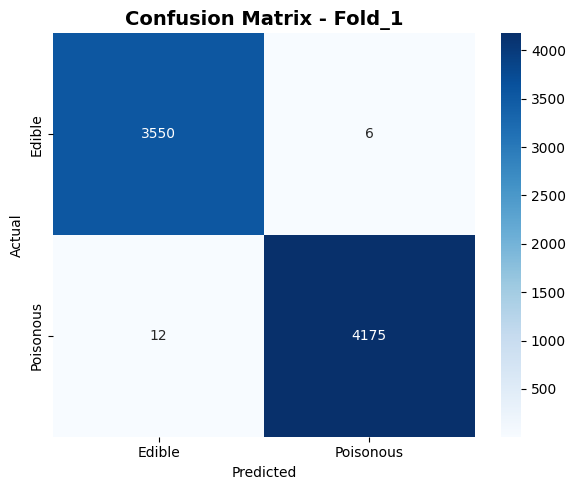

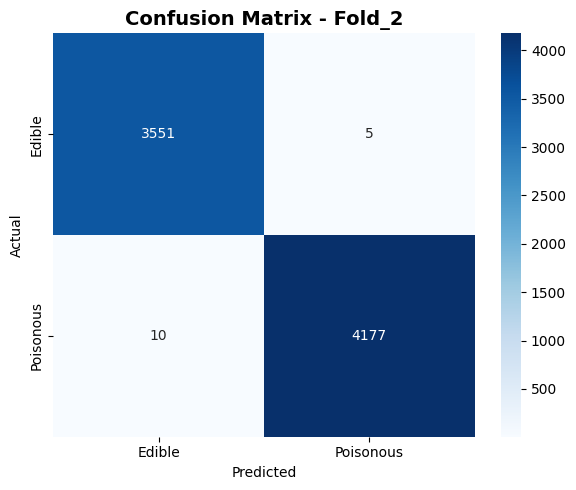

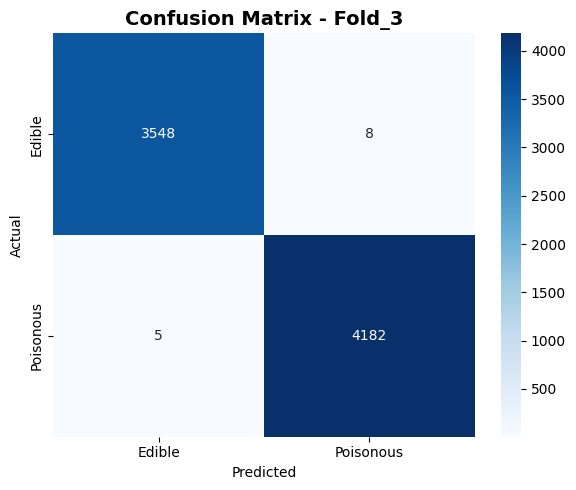

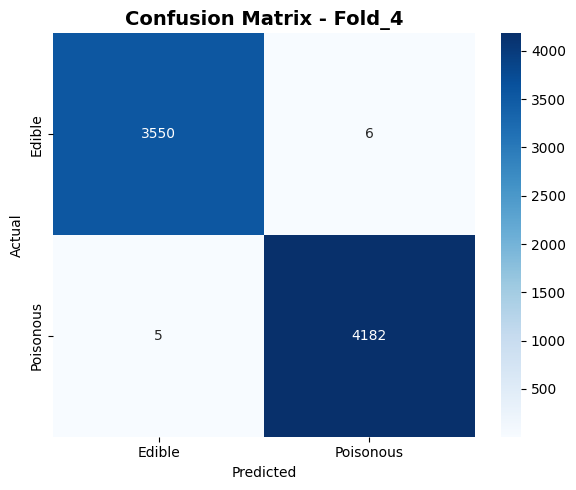

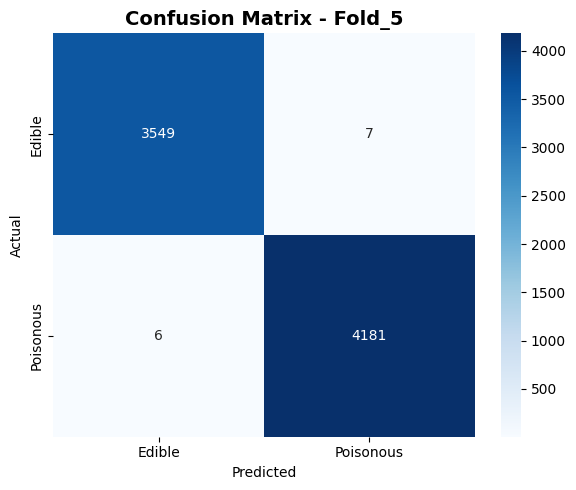


Confusion Matrix Values for Each Fold:


,Model,TN,FP,FN,TP
0,Fold_1,3550,6,12,4175
1,Fold_2,3551,5,10,4177
2,Fold_3,3548,8,5,4182
3,Fold_4,3550,6,5,4182
4,Fold_5,3549,7,6,4181


In [43]:
# Create individual confusion matrices for each fold
for idx, (model_name, model) in enumerate(models):
    # Make predictions on test set
    y_test_pred = model.predict(X_test)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    
    # Create individual plot
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Edible', 'Poisonous'], 
                yticklabels=['Edible', 'Poisonous'])
    plt.title(f'Confusion Matrix - {model_name}', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Also create a summary table with confusion matrix values
cm_results = []
for model_name, model in models:
    y_test_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_test_pred)
    
    cm_results.append({
        'Model': model_name,
        'TN': cm[0,0],
        'FP': cm[0,1],
        'FN': cm[1,0],
        'TP': cm[1,1]
    })

cm_df = pd.DataFrame(cm_results)
print("\nConfusion Matrix Values for Each Fold:")
display(cm_df)


### Feature Importance


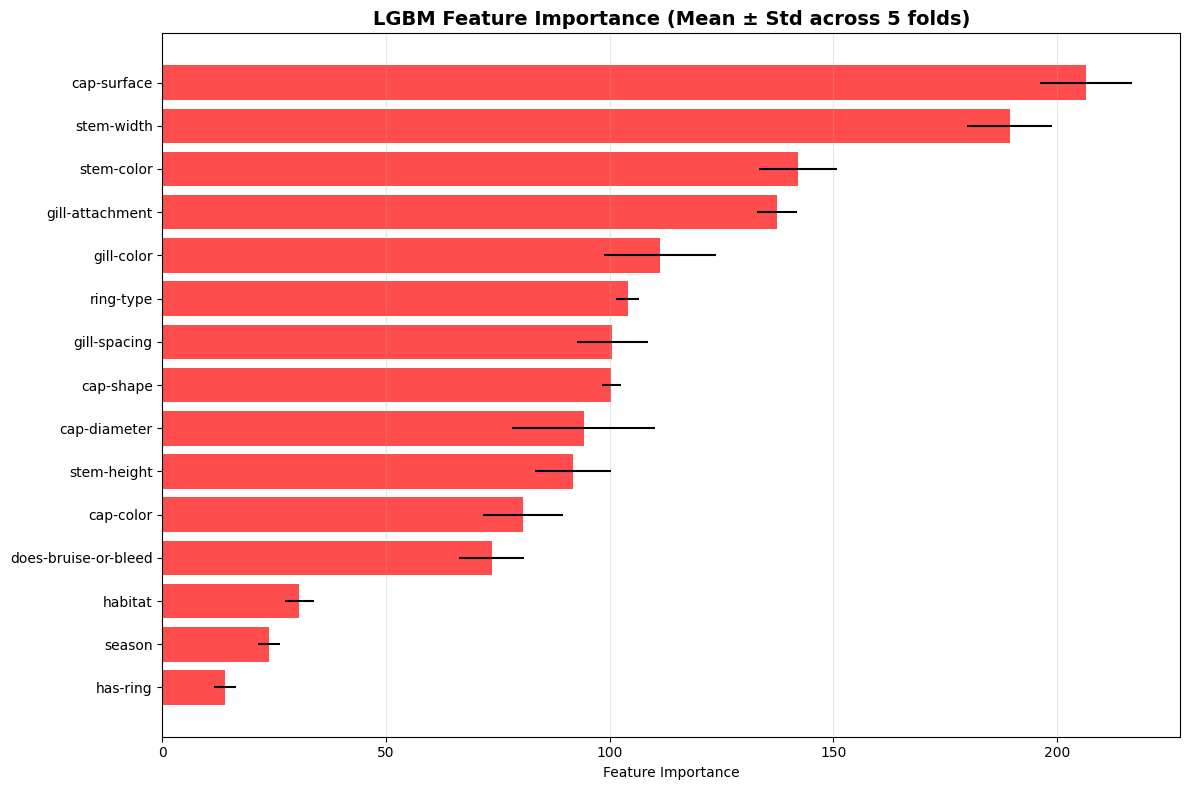

In [100]:
# Load all Random Forest models and calculate feature importance
model_dir = 'model_result/LGBM'
feature_importances = []

# Load all saved Random Forest models
for i in range(1, 6):  # Assuming 5 folds
    model_path = os.path.join(model_dir, f'Fold_{i}.pkl')
    if os.path.exists(model_path):
        model = joblib.load(model_path)
        # Get feature importance for this fold
        importance = model.feature_importances_
        feature_importances.append(importance)

# Convert to DataFrame for easier manipulation
feature_importance_df = pd.DataFrame(feature_importances, 
                                   columns=X.columns,
                                   index=[f'Fold_{i+1}' for i in range(len(feature_importances))])

# Calculate mean and std of feature importance across folds
mean_importance = feature_importance_df.mean()
std_importance = feature_importance_df.std()

# Create summary DataFrame
importance_summary = pd.DataFrame({
    'Feature': X.columns,
    'Mean_Importance': mean_importance.values,
    'Std_Importance': std_importance.values
}).sort_values('Mean_Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(importance_summary)), importance_summary['Mean_Importance'], xerr=importance_summary['Std_Importance'], alpha=0.7, color='red')
plt.yticks(range(len(importance_summary)), importance_summary['Feature'])
plt.xlabel('Feature Importance')
plt.title('LGBM Feature Importance (Mean ± Std across 5 folds)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## Extreme Gradient Boosting (XGBoost)


In [47]:
import xgboost as xgb

# Create directory if it doesn't exist
os.makedirs('model_result/XGBoost', exist_ok=True)

# Initialize model and cross-validator
xgb_model = xgb.XGBClassifier(random_state=42, n_estimators=10, max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# List untuk menyimpan hasil metrik
train_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'mcc': []}
val_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'mcc': []}

for train_idx, val_idx in skf.split(X_train, y_train):
    X_train_cv, X_val_cv = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Print training data info before SMOTE
    print('Fold', len(train_metrics['accuracy']) + 1)
    # Apply SMOTE to training data
    X_train_cv_smote, y_train_cv_smote = smote.fit_resample(X_train_cv, y_train_cv)
    print(f"Before SMOTE: {len(X_train_cv)} ->", f"After SMOTE: {len(X_train_cv_smote)}")
    print('-' * 50)

    # Train model on SMOTE-resampled data
    xgb_model.fit(X_train_cv_smote, y_train_cv_smote)

    # Prediksi train dan val (using original training data for train metrics, not SMOTE data)
    y_train_pred = xgb_model.predict(X_train_cv)
    y_val_pred = xgb_model.predict(X_val_cv)

    # Train metrics
    train_metrics['accuracy'].append(accuracy_score(y_train_cv, y_train_pred))
    train_metrics['precision'].append(precision_score(y_train_cv, y_train_pred))
    train_metrics['recall'].append(recall_score(y_train_cv, y_train_pred))
    train_metrics['f1'].append(f1_score(y_train_cv, y_train_pred))
    train_metrics['mcc'].append(matthews_corrcoef(y_train_cv, y_train_pred))

    # val metrics
    val_metrics['accuracy'].append(accuracy_score(y_val_cv, y_val_pred))
    val_metrics['precision'].append(precision_score(y_val_cv, y_val_pred))
    val_metrics['recall'].append(recall_score(y_val_cv, y_val_pred))
    val_metrics['f1'].append(f1_score(y_val_cv, y_val_pred))
    val_metrics['mcc'].append(matthews_corrcoef(y_val_cv, y_val_pred))

    # Save the model for this fold
    fold_num = len(train_metrics['accuracy'])
    joblib.dump(xgb_model, f'model_result/XGBoost/Fold_{fold_num}.pkl')


Fold 1
Before SMOTE: 24776 -> After SMOTE: 26436
--------------------------------------------------
Fold 2
Before SMOTE: 24776 -> After SMOTE: 26436
--------------------------------------------------
Fold 3
Before SMOTE: 24776 -> After SMOTE: 26436
--------------------------------------------------
Fold 4
Before SMOTE: 24776 -> After SMOTE: 26438
--------------------------------------------------
Fold 5
Before SMOTE: 24776 -> After SMOTE: 26438
--------------------------------------------------


### Train & Val


In [48]:
train_metrics_df = pd.DataFrame(train_metrics)
train_metrics_df.index = [f'Fold {i+1}' for i in range(len(train_metrics_df))]
print("\nTrain Metrics per Fold:")
display(train_metrics_df)

val_metrics_df = pd.DataFrame(val_metrics)
val_metrics_df.index = [f'Fold {i+1}' for i in range(len(val_metrics_df))]
print("val Metrics per Fold:")
display(val_metrics_df)


Train Metrics per Fold:


,accuracy,precision,recall,f1,mcc
Fold 1,0.999556,0.999319,0.999849,0.999584,0.999108
Fold 2,0.999556,0.999319,0.999849,0.999584,0.999108
Fold 3,0.999637,0.999395,0.999924,0.999660,0.999270
Fold 4,0.999758,0.999697,0.999849,0.999773,0.999513
Fold 5,0.999637,0.999395,0.999924,0.999660,0.999270


val Metrics per Fold:


,accuracy,precision,recall,f1,mcc
Fold 1,0.998870,0.998187,0.999697,0.998942,0.997731
Fold 2,0.998224,0.998185,0.998487,0.998336,0.996432
Fold 3,0.998870,0.998489,0.999395,0.998941,0.997730
Fold 4,0.996448,0.996370,0.996973,0.996672,0.992864
Fold 5,0.998063,0.996981,0.999395,0.998186,0.996111


### Test


In [ ]:
# Load all models from the Random Forest directory
model_dir = 'model_result/XGBoost'
models = []

# Load all saved models
for i in range(1, 6):  # Assuming 5 folds
    model_path = os.path.join(model_dir, f'Fold_{i}.pkl')
    if os.path.exists(model_path):
        model = joblib.load(model_path)
        models.append((f'Fold_{i}', model))

# Test all loaded models on the test set
test_results = []

for model_name, model in models:
    # Make predictions on test set
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    mcc = matthews_corrcoef(y_test, y_test_pred)

    # Store results
    test_results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'MCC': mcc
    })

# Convert to DataFrame for better visualization
final_results_df = pd.DataFrame(test_results)
print("\nFinal Test Results for All Models:")
display(final_results_df)


Final Test Results for All Models:


,Model,Accuracy,Precision,Recall,F1-Score,MCC
0,Fold_1,0.998838,0.998568,0.999283,0.998926,0.997660
1,Fold_2,0.997804,0.997376,0.998567,0.997971,0.995580
2,Fold_3,0.998579,0.998092,0.999283,0.998687,0.997140
3,Fold_4,0.997804,0.997613,0.998328,0.997971,0.995580
4,Fold_5,0.999096,0.998331,1.000000,0.999165,0.998181


### Confusion Matrix


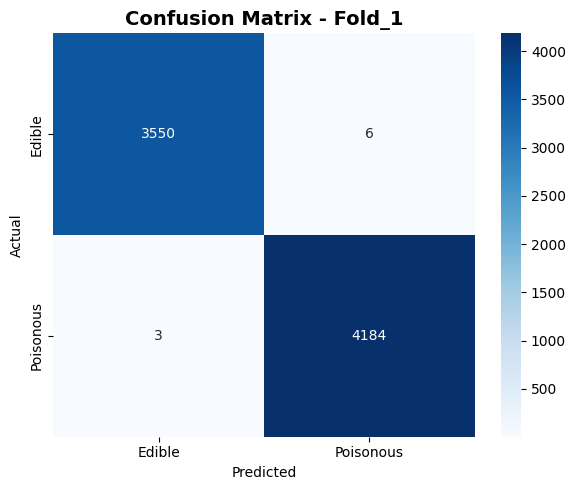

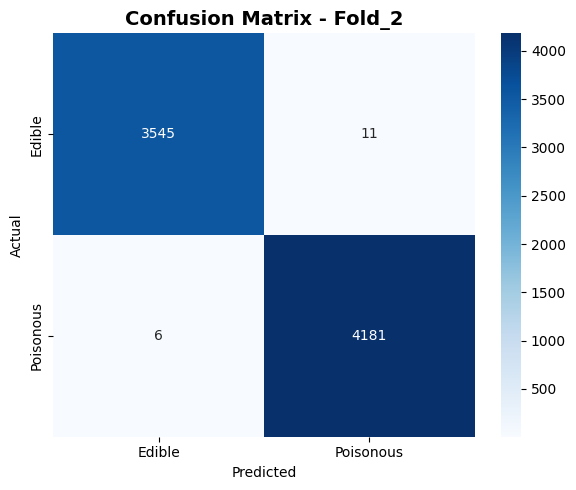

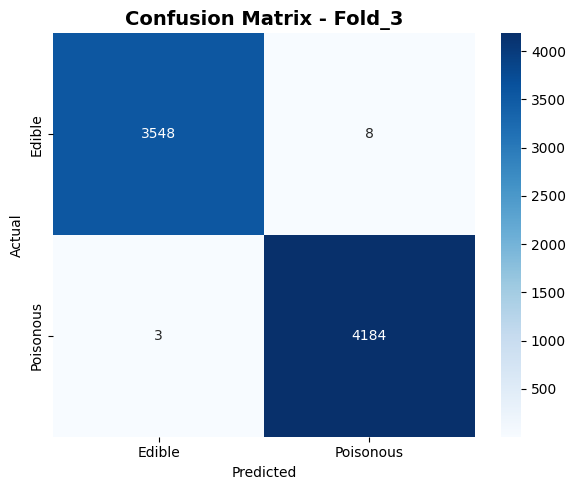

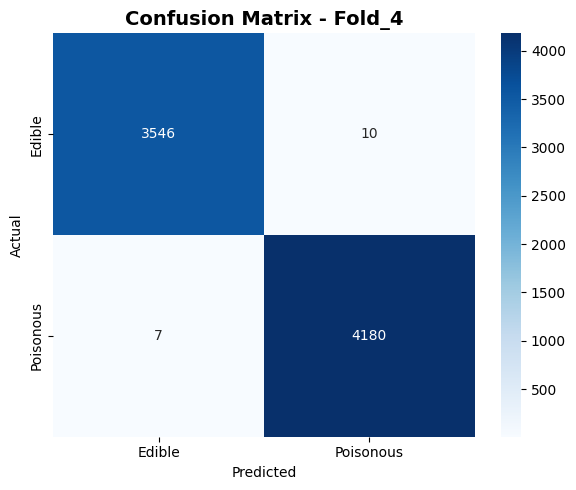

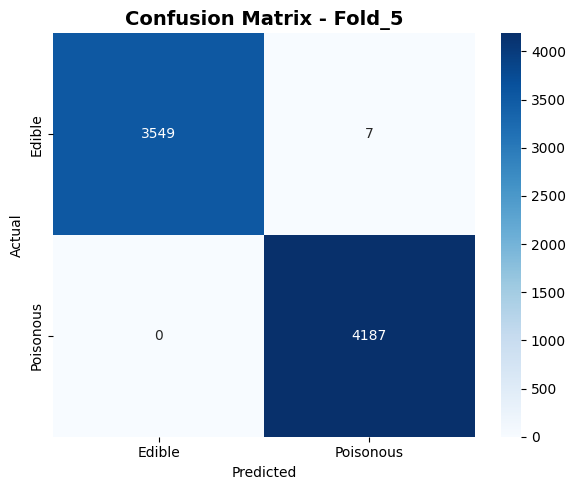


Confusion Matrix Values for Each Fold:


,Model,TN,FP,FN,TP
0,Fold_1,3550,6,3,4184
1,Fold_2,3545,11,6,4181
2,Fold_3,3548,8,3,4184
3,Fold_4,3546,10,7,4180
4,Fold_5,3549,7,0,4187


In [ ]:
# Create individual confusion matrices for each fold
for idx, (model_name, model) in enumerate(models):
    # Make predictions on test set
    y_test_pred = model.predict(X_test)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)

    # Create individual plot
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Edible', 'Poisonous'],
                yticklabels=['Edible', 'Poisonous'])
    plt.title(f'Confusion Matrix - {model_name}', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Also create a summary table with confusion matrix values
cm_results = []
for model_name, model in models:
    y_test_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_test_pred)

    cm_results.append({
        'Model': model_name,
        'TN': cm[0,0],
        'FP': cm[0,1],
        'FN': cm[1,0],
        'TP': cm[1,1]
    })

cm_df = pd.DataFrame(cm_results)
print("\nConfusion Matrix Values for Each Fold:")
display(cm_df)

### Feature Importance


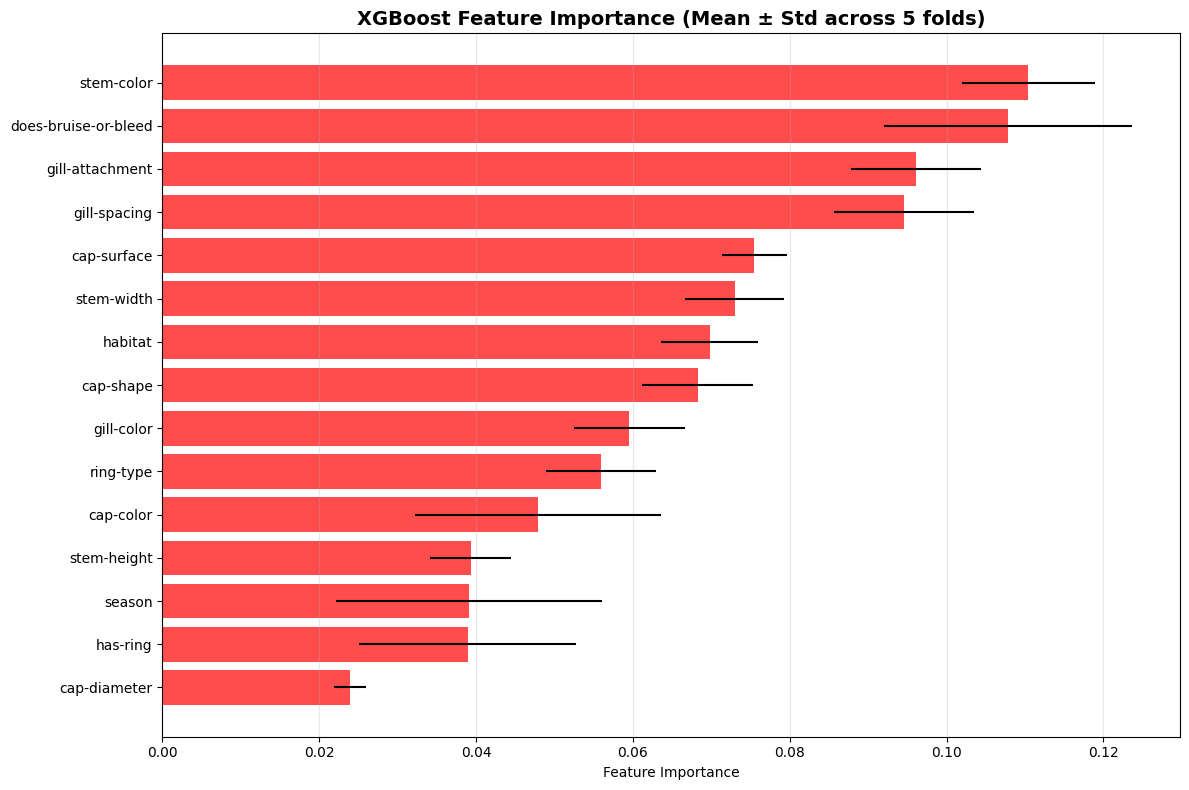

In [101]:
# Load all Random Forest models and calculate feature importance
model_dir = 'model_result/XGBoost'
feature_importances = []

# Load all saved Random Forest models
for i in range(1, 6):  # Assuming 5 folds
    model_path = os.path.join(model_dir, f'Fold_{i}.pkl')
    if os.path.exists(model_path):
        model = joblib.load(model_path)
        # Get feature importance for this fold
        importance = model.feature_importances_
        feature_importances.append(importance)

# Convert to DataFrame for easier manipulation
feature_importance_df = pd.DataFrame(feature_importances, 
                                   columns=X.columns,
                                   index=[f'Fold_{i+1}' for i in range(len(feature_importances))])

# Calculate mean and std of feature importance across folds
mean_importance = feature_importance_df.mean()
std_importance = feature_importance_df.std()

# Create summary DataFrame
importance_summary = pd.DataFrame({
    'Feature': X.columns,
    'Mean_Importance': mean_importance.values,
    'Std_Importance': std_importance.values
}).sort_values('Mean_Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(importance_summary)), importance_summary['Mean_Importance'], xerr=importance_summary['Std_Importance'], alpha=0.7, color='red')
plt.yticks(range(len(importance_summary)), importance_summary['Feature'])
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importance (Mean ± Std across 5 folds)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()